In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/TSDN 2020 - FromScratch/all.csv', sep='|', index_col=0, engine='python')

In [3]:
df=pd.read_csv('all.csv', sep='|', index_col=0, engine='python')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34746 entries, 1 to 34746
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_title             34746 non-null  object 
 1   location              34746 non-null  object 
 2   salary_currency       34742 non-null  object 
 3   career_level          34746 non-null  object 
 4   experience_level      30205 non-null  object 
 5   education_level       34746 non-null  object 
 6   employment_type       33402 non-null  object 
 7   job_function          34746 non-null  object 
 8   job_benefits          27330 non-null  object 
 9   company_process_time  24555 non-null  object 
 10  company_size          29103 non-null  object 
 11  company_industry      33132 non-null  object 
 12  job_description       34745 non-null  object 
 13  salary                9352 non-null   float64
dtypes: float64(1), object(13)
memory usage: 4.0+ MB


In [6]:
df.head()

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
id,,,,,,,,,,,,,,
1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


# Data Preparation and Cleansing

In [5]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job_title,34746,20632,Sales Executive,325
location,34746,200,Jakarta Raya,8153
salary_currency,34742,2,IDR,34731
career_level,34746,6,Pegawai (non-manajemen & non-supervisor),19348
experience_level,30205,20,1 tahun,10754
education_level,34746,21,Sarjana (S1),11180
employment_type,33402,10,Penuh Waktu,28492
job_function,34746,68,"Penjualan / Pemasaran,Penjualan Ritel",3763
job_benefits,27330,3185,"Asuransi kesehatan;Waktu regular, Senin - Juma...",2150
company_process_time,24555,30,29 days,4576


In [6]:
df_salary_job=df.groupby('job_title').agg({'salary':'mean'})
df_salary_job

,salary
job_title,
"""Open for Fresh Graduates"" - SAP ABAP (Semarang)",NaN
(JV2101012) Agency Relation - Jakarta2,NaN
(JV2105001) Account Officer Sales - Lampung,NaN
(JV2112001) Account Officer - Sales - Cirebon,NaN
(JV2112006) Account Officer - Sales - Manado,NaN
...,...
融资经理,26400000.0
财务会计,13250000.0
跨境电商公司总经理 (DIRECTOR E-COMMERCE),NaN


In [7]:
df['job_title'].replace(to_replace ='[^a-zA-Z]', value = ' ', regex = True)

id
1           Facility Maintenance   Smart Warehouse Manager
2                              Procurement Department Head
3                                              SALES ADMIN
4             City Operation Lead Shopee Express  Cirebon 
5                                     Japanese Interpreter
                               ...                        
34742                                     Staff Accounting
34743                                   Frontend Developer
34744                                      Account Manager
34745                                                Sales
34746    Credit Marketing Officer  CMO    Tangerang   C...
Name: job_title, Length: 34746, dtype: object

In [8]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
salary,9352.0,7.358879e+06,2.148128e+07,10.0,4250000.0,5500000.0,8000000.0,2.000000e+09


### Handling Missing Values

In [9]:
df.isna().sum()

job_title                   0
location                    0
salary_currency             4
career_level                0
experience_level         4541
education_level             0
employment_type          1344
job_function                0
job_benefits             7416
company_process_time    10191
company_size             5643
company_industry         1614
job_description             1
salary                  25394
dtype: int64

#### Data Numeric

In [10]:
df_nums=df.select_dtypes(include=np.number)

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', 
                        missing_values=np.nan)
imputer = imputer.fit(df_nums)
df_nums.iloc[:,:] = imputer.transform(df_nums)
df_nums

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,salary
id,
1,5500000.0
2,5500000.0
3,5500000.0
4,5500000.0
5,5500000.0
...,...
34742,4500000.0
34743,11500000.0
34744,6250000.0


#### Data Object

In [12]:
df_objt=df.select_dtypes(include=object)

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(df_objt)
df_objt.iloc[:,:] = imputer.transform(df_objt)
df_objt

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
id,,,,,,,,,,,,,
1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan","Asuransi kesehatan;Waktu regular, Senin - Juma...",29 days,51 - 200 pekerja,Manufaktur/Produksi,Deskripsi PekerjaanRequirements :D3/SI from re...
2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material","Asuransi kesehatan;Waktu regular, Senin - Juma...",25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...
3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...
4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...
5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor","Asuransi kesehatan;Waktu regular, Senin - Juma...",23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34742,Staff Accounting,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Kontrak,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",29 days,1- 50 pekerja,Manufaktur/Produksi,Candidate must possess at least Bachelor's Deg...
34743,Frontend Developer,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",24 days,501 - 1000 pekerja,Perbankan/Pelayanan Keuangan,job description :1.Participate in the daily de...
34744,Account Manager,Jakarta Selatan,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Korporasi","Asuransi kesehatan;Waktu regular, Senin - Juma...",27 days,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Keras),Tugas & Tanggung Jawab:Melakukan program pemas...


#### Concat Data Numeric dan Objectiv

In [14]:
df=pd.concat([df_objt,df_nums], axis=1)
df

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
id,,,,,,,,,,,,,,
1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan","Asuransi kesehatan;Waktu regular, Senin - Juma...",29 days,51 - 200 pekerja,Manufaktur/Produksi,Deskripsi PekerjaanRequirements :D3/SI from re...,5500000.0
2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material","Asuransi kesehatan;Waktu regular, Senin - Juma...",25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,5500000.0
3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,5500000.0
4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,5500000.0
5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor","Asuransi kesehatan;Waktu regular, Senin - Juma...",23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,5500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34742,Staff Accounting,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Kontrak,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",29 days,1- 50 pekerja,Manufaktur/Produksi,Candidate must possess at least Bachelor's Deg...,4500000.0
34743,Frontend Developer,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",24 days,501 - 1000 pekerja,Perbankan/Pelayanan Keuangan,job description :1.Participate in the daily de...,11500000.0
34744,Account Manager,Jakarta Selatan,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Korporasi","Asuransi kesehatan;Waktu regular, Senin - Juma...",27 days,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Keras),Tugas & Tanggung Jawab:Melakukan program pemas...,6250000.0


In [15]:
df.isna().sum()

job_title               0
location                0
salary_currency         0
career_level            0
experience_level        0
education_level         0
employment_type         0
job_function            0
job_benefits            0
company_process_time    0
company_size            0
company_industry        0
job_description         0
salary                  0
dtype: int64

### Handling Duplicated Data

In [16]:
df.duplicated().sum()

4984

In [17]:
cats=['job_title','location','salary_currency','career_level','experience_level','education_level','employment_type','job_function','job_benefits',
      'company_process_time','company_size','company_industry','job_description']
nums=['salary']

In [18]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job_title:
Sales Executive                                        325
Management Trainee                                     171
Sales                                                  137
Accounting Staff                                       125
Sales Engineer                                         115
                                                      ... 
Staff Admin PPJK                                         1
Assistant Manager FA ACC & Tax                           1
Senior Agronomist (R&D)                                  1
Customer Service & Document Semarang                     1
Credit Marketing Officer (CMO) - Tangerang & Cikupa      1
Name: job_title, Length: 20632, dtype: int64

Value count kolom location:
Jakarta Raya           8153
Jakarta Selatan        2611
Jakarta Barat          1979
Tangerang              1933
Jakarta Utara          1612
                       ... 
Karangasem                1
Penajam Paser Utara       1
Tapanuli                

1. Urgent Position
2. Few candidates, medium steps
3. Lots of candidate
4. Lots candidate, lots of step too

1. Manufactur/ Pabrik
2. Tech Industry
3. Migas
4. Fashion
5. Penerbangan
6. Consulting
7. Retail
8. Lainnya

## Classification Data Object

#### Job Function

In [19]:
df['job_function'].unique()

array(['Manufaktur,Pemeliharaan',
       'Manufaktur,Pembelian/Manajemen Material',
       'Penjualan / Pemasaran,Penjualan Ritel',
       'Pelayanan,Logistik/Rantai Pasokan', 'Lainnya,Jurnalis/Editor',
       'Manufaktur,Manufaktur', 'Penjualan / Pemasaran,E-commerce',
       'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan',
       'Teknik,Teknik Elektro', 'Akuntansi / Keuangan,Audit & Pajak',
       'Komputer/Teknologi Informasi,IT-Perangkat Lunak',
       'Komputer/Teknologi Informasi,IT-Admin Jaringan/Sistem/Database',
       'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis',
       'Sains,Sains & Teknologi',
       'Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran',
       'Bangunan/Konstruksi,Properti/Real Estate',
       'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR',
       'Penjualan / Pemasaran,Penjualan - Korporasi',
       'Pendidikan/Pelatihan,Pelatihan & Pengembangan',
       'Penjualan / Pemasaran,Penjualan - Jasa Keuangan',
       'Teknik,Mekanikal', '

In [20]:
df5=df.groupby('job_function').agg({'salary':'mean'}).sort_values('salary', ascending= True)
df5

,salary
job_function,
"Manufaktur,Kontrol Proses",4.900000e+06
"Pelayanan,Perawatan Pribadi",5.086791e+06
"Sumber Daya Manusia/Personalia,Staf / Administrasi umum",5.147479e+06
"Lainnya,Pekerjaan Umum",5.178243e+06
"Penjualan / Pemasaran,Telesales/Telemarketing",5.223338e+06
...,...
"Teknik,Teknik Industri",6.856087e+06
"Komputer/Teknologi Informasi,IT-Perangkat Lunak",6.934734e+06
"Layanan Kesehatan,Diagnosa/Lainnya",7.379010e+06


In [21]:
df5.sort_values('salary',ascending= False )

,salary
job_function,
"Sumber Daya Manusia/Personalia,Top Management / Manajemen Tingkat Atas",1.181308e+07
"Sains,Geologi/Geofisika",7.542857e+06
"Layanan Kesehatan,Diagnosa/Lainnya",7.379010e+06
"Komputer/Teknologi Informasi,IT-Perangkat Lunak",6.934734e+06
"Teknik,Teknik Industri",6.856087e+06
...,...
"Penjualan / Pemasaran,Telesales/Telemarketing",5.223338e+06
"Lainnya,Pekerjaan Umum",5.178243e+06
"Sumber Daya Manusia/Personalia,Staf / Administrasi umum",5.147479e+06


In [22]:
df5.to_excel('df5.xlsx')

Tambahan Class buat Job_Function
1. Science and Research Position
2. Ops and Manufactur (Pekerja Kasar)
3. Customer Facing Position
4. Lainnya
5. Healthcare
6. Penjualan / Pemasaran,Penjualan Ritel                      3763
7. Komputer/Teknologi Informasi,IT-Perangkat Lunak            2674
8. Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis        2458
9. Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan           2203
10. Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR 
```
# This is formatted as code
```



In [23]:
df['job_function']=df['job_function'].replace(['Manufaktur,Pemeliharaan'],'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Manufaktur,Pembelian/Manajemen Material'],'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Penjualan Ritel'], 'Penjualan / Pemasaran,Penjualan Ritel')
df['job_function']=df['job_function'].replace(['Pelayanan,Logistik/Rantai Pasokan'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Lainnya,Jurnalis/Editor'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Manufaktur,Manufaktur'], 'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,E-commerce'], 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan'], 'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan')
df['job_function']=df['job_function'].replace(['Teknik,Teknik Elektro'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Komputer/Teknologi Informasi,IT-Perangkat Lunak'], 'Komputer/Teknologi Informasi,IT-Perangkat Lunak')
df['job_function']=df['job_function'].replace(['Komputer/Teknologi Informasi,IT-Admin Jaringan/Sistem/Database'], 'Komputer/Teknologi Informasi,IT-Perangkat Lunak')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis'], 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Sains,Sains & Teknologi'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Bangunan/Konstruksi,Properti/Real Estate'], 'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR'], 'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Penjualan - Korporasi'], 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Pendidikan/Pelatihan,Pelatihan & Pengembangan'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Penjualan - Jasa Keuangan'], 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Teknik,Mekanikal'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Pelayanan,Perawatan Pribadi'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Sumber Daya Manusia/Personalia,Top Management / Manajemen Tingkat Atas'], 'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR')
df['job_function']=df['job_function'].replace(['Seni/Media/Komunikasi,Hubungan Masyarakat'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Digital Marketing'],'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Bangunan/Konstruksi,Teknik Sipil/Konstruksi Bangunan'],'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Lainnya,Penerbitan'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Lainnya,Lainnya/Kategori tidak tersedia'], 'Lainnya')
df['job_function']=df['job_function'].replace(['Sumber Daya Manusia/Personalia,Staf / Administrasi umum'], 'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR')
df['job_function']=df['job_function'].replace(['Sains,Pertanian'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Lainnya,Pekerjaan Umum'], 'Lainnya')
df['job_function']=df['job_function'].replace(['Sains,Aktuaria/Statistik'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Telesales/Telemarketing'], 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Teknik,Teknik Lingkungan'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Layanan Kesehatan,Diagnosa/Lainnya'], 'Healthcare')
df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Perbankan / Jasa Finansial'], 'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan')
df['job_function']=df['job_function'].replace(['Bangunan/Konstruksi,Arsitek/Desain Interior'], 'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Komputer/Teknologi Informasi,IT-Perangkat Keras'], 'Komputer/Teknologi Informasi,IT-Perangkat Lunak')
df['job_function']=df['job_function'].replace(['Teknik,Teknik Lainnya'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Pelayanan,Pengacara / Asisten Legal'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Layanan Kesehatan,Farmasi'], 'Healthcare')
df['job_function']=df['job_function'].replace(['Pendidikan/Pelatihan,Pendidikan'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Seni/Media/Komunikasi,Seni / Desain Kreatif'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Keuangan / Investasi Perusahaan'], 'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Merchandising'], 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Pelayanan,Layanan Pelanggan'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Pelayanan,Teknikal & Bantuan Pelanggan'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Penjualan - Teknik/Teknikal/IT'], 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')
df['job_function']=df['job_function'].replace(['Teknik,Teknik Elektronika'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Seni/Media/Komunikasi,Periklanan'],'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Pelayanan,Angkatan Bersenjata'],'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Bangunan/Konstruksi,Survei Kuantitas'],'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Manufaktur,Penjaminan Kualitas / QA'],'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Layanan Kesehatan,Praktisi/Asisten Medis'], 'Healthcare')
df['job_function']=df['job_function'].replace(['Sumber Daya Manusia/Personalia,Sekretaris'],'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR')
df['job_function']=df['job_function'].replace(['Teknik,Teknik Industri'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Pelayanan,Layanan Sosial/Konseling'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Sains,Teknologi Makanan/Ahli Gizi'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Teknik,Teknik Kimia'],'Science and Research Position')
df['job_function']=df['job_function'].replace(['Sains,Biomedis'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Sains,Geologi/Geofisika'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Hotel/Restoran,Hotel/Pariwisata'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Sains,Bioteknologi'],'Science and Research Position')
df['job_function']=df['job_function'].replace(['Teknik,Minyak/Gas'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Sains,Kimia'], 'Science and Research Position')
df['job_function']=df['job_function'].replace(['Manufaktur,Kontrol Proses'],'Ops and Manufactur (Pekerja Kasar)')
df['job_function']=df['job_function'].replace(['Seni/Media/Komunikasi,Hiburan'], 'Customer Facing Position')
df['job_function']=df['job_function'].replace(['Sains,Penerbangan'],'Science and Research Position')
df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Perbankan / Jasa Finansial '],'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan')
df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Keuangan / Investasi Perusahaan '],'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan')

In [24]:
df['job_function'].value_counts()

Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis        6760
Customer Facing Position                                   5928
Penjualan / Pemasaran,Penjualan Ritel                      3763
Komputer/Teknologi Informasi,IT-Perangkat Lunak            3734
Ops and Manufactur (Pekerja Kasar)                         3583
Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan           3471
Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR    2920
Science and Research Position                              2354
Healthcare                                                  804
Akuntansi / Keuangan,Audit & Pajak                          743
Lainnya                                                     686
Name: job_function, dtype: int64

In [25]:
df1=df.groupby('job_function').agg({'salary':'mean'})
df1


,salary
job_function,
"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",5.916785e+06
"Akuntansi / Keuangan,Audit & Pajak",6.314077e+06
Customer Facing Position,5.653263e+06
Healthcare,6.113618e+06
"Komputer/Teknologi Informasi,IT-Perangkat Lunak",6.663844e+06
Lainnya,5.821343e+06
Ops and Manufactur (Pekerja Kasar),5.911675e+06
"Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis",6.036312e+06
"Penjualan / Pemasaran,Penjualan Ritel",6.091642e+06


In [26]:
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis'],'Pekerjaan Umum')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Penjualan Ritel'], 'Pekerjaan Umum')
df['job_function']=df['job_function'].replace(['Ops and Manufactur (Pekerja Kasar)'], 'Pekerjaan Umum')
df['job_function']=df['job_function'].replace(['Lainnya,Jurnalis/Editor'], 'Pekerjaan Umum')
df['job_function']=df['job_function'].replace(['Science and Research Position'], 'Pekerjaan Umum')
df['job_function']=df['job_function'].replace(['Lainnya'], 'Pekerjaan Umum')
df['job_function']=df['job_function'].replace(['Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR'], 'Pekerjaan Umum')
df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Audit & Pajak'], 'Audit dan Pajak')
df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan'], 'Pekerjaan Umum')

In [27]:
df_salary=df.groupby('job_function').agg({'salary':'mean'})
df_salary

,salary
job_function,
Audit dan Pajak,6.314077e+06
Customer Facing Position,5.653263e+06
Healthcare,6.113618e+06
"Komputer/Teknologi Informasi,IT-Perangkat Lunak",6.663844e+06
Pekerjaan Umum,5.968696e+06


In [ ]:
#df['job_function']=np.where(df['salary']<501,'Small Company',
                           # (np.where(df['salary']<2001,'Middle Company','Big Company')))

df['job_function']=df['job_function'].replace(['Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan'],'')
df['job_function']=df['job_function'].replace(['Customer Facing Position'],'')
df['job_function']=df['job_function'].replace(['Healthcare'],'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan')
df['job_function']=df['job_function'].replace(['Komputer/Teknologi Informasi,IT-Perangkat Lunak'],'')
df['job_function']=df['job_function'].replace(['Lainnya'],'')
df['job_function']=df['job_function'].replace(['Ops and Manufactur (Pekerja Kasar)'],'')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis'],'')
df['job_function']=df['job_function'].replace(['Penjualan / Pemasaran,Penjualan Ritel'],'')
df['job_function']=df['job_function'].replace(['Lainnya'],'Science and Research Position')
df['job_function']=df['job_function'].replace(['Lainnya'],'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR')

bagian yang pekerjaan umum dan aktegori lainnya belum di isi, krn enggak tau mau di bagian mana. sama yang executive, enggak nemu di job functionnya.

#### Employment Type

In [29]:
df['employment_type'].unique()

array(['Penuh Waktu', 'Kontrak', 'Temporer, Magang', 'Magang',
       'Paruh Waktu', 'Temporer', 'Penuh Waktu, Magang',
       'Penuh Waktu, Kontrak', 'Penuh Waktu, Paruh Waktu',
       'Kontrak, Temporer'], dtype=object)

In [30]:
df['employment_type']=df['employment_type'].replace(['Penuh Waktu, Kontrak'],'Kontrak')
df['employment_type']=df['employment_type'].replace(['Penuh Waktu, Magang'],'Magang')
df['employment_type']=df['employment_type'].replace(['Kontrak, Temporer'],'Temporer')
df['employment_type']=df['employment_type'].replace(['Temporer, Magang'],'Temporer')
df['employment_type']=df['employment_type'].replace(['Penuh Waktu, Paruh Waktu'],'Paruh Waktu')

In [31]:
df['employment_type'].value_counts()

Penuh Waktu    29836
Kontrak         4279
Paruh Waktu      300
Magang           203
Temporer         128
Name: employment_type, dtype: int64

In [32]:
df['employment_type']=df['employment_type'].replace(['Magang'],'Kontrak')
df['employment_type']=df['employment_type'].replace(['Temporer'],'Kontrak')

In [33]:
df['employment_type'].value_counts()

Penuh Waktu    29836
Kontrak         4610
Paruh Waktu      300
Name: employment_type, dtype: int64

Dijadiin cuman Penuh Waktu, Paruh Waktu, Kontrak, Temporer, Magang

#### Company size

In [34]:
df['company_size'].value_counts()

51 - 200 pekerja           13294
1- 50 pekerja               5770
201 - 500 pekerja           4347
501 - 1000 pekerja          3434
2001 - 5000 pekerja         2723
Lebih dari 5000 pekerja     2691
1001 - 2000 pekerja         2487
Name: company_size, dtype: int64

In [35]:
df['company_size']=df['company_size'].str.replace(' pekerja','')
df['company_size']=df['company_size'].replace('51 - 200',200)
df['company_size']=df['company_size'].replace('1- 50',50)
df['company_size']=df['company_size'].replace('201 - 500',500)
df['company_size']=df['company_size'].replace('501 - 1000',1000)
df['company_size']=df['company_size'].replace('2001 - 5000',5000)
df['company_size']=df['company_size'].replace('1001 - 2000',2000)
df['company_size']=df['company_size'].replace('Lebih dari 5000',5001)

In [36]:
df['company_size'].value_counts()

200     13294
50       5770
500      4347
1000     3434
5000     2723
5001     2691
2000     2487
Name: company_size, dtype: int64

In [37]:
df['company_size']=df['company_size'].astype('float')

In [38]:
df['company_size']=np.where(df['company_size']<501,'Small Company',
                            (np.where(df['company_size']<2001,'Middle Company','Big Company')))

In [39]:
df['company_size'].value_counts()

Small Company     23411
Middle Company     5921
Big Company        5414
Name: company_size, dtype: int64

#### Location


In [40]:
df['location']=df['location'].replace(['Bandung'], 'Jawa Barat') 
df['location']=df['location'].replace(['Jakarta Raya'], 'DKI Jakarta') 
df['location']=df['location'].replace(['Jakarta Barat'], 'DKI Jakarta') 
df['location']=df['location'].replace(['Cirebon'], 'Jawa Barat')  
df['location']=df['location'].replace(['Bekasi'], 'Jawa Barat') 
df['location']=df['location'].replace(['Balikpapan'], 'Kalimantan') 
df['location']=df['location'].replace(['Tangerang'], 'Jawa Barat') 
df['location']=df['location'].replace(['Banten'], 'Jawa Barat') 
df['location']=df['location'].replace(['Jakarta Utara'], 'DKI Jakarta') 
df['location']=df['location'].replace(['Jakarta Selatan'], 'DKI Jakarta') 
df['location']=df['location'].replace(['Bali'], 'Bali') 
df['location']=df['location'].replace(['Cikarang'], 'Jawa Barat')  
df['location']=df['location'].replace(['Jakarta Pusat'], 'DKI Jakarta') 
df['location']=df['location'].replace(['Pontianak'], 'Kalimantan') 
df['location']=df['location'].replace(['Surabaya'], 'Jawa Timur') 
df['location']=df['location'].replace(['Medan'], 'Sumatera') 
df['location']=df['location'].replace(['Cilegon'], 'Jawa Barat') 
df['location']=df['location'].replace(['Manado'], 'Sulawesi') 
df['location']=df['location'].replace(['Papua'], 'Papua') 
df['location']=df['location'].replace(['Makassar'], 'Sulawesi') 
df['location']=df['location'].replace(['Jakarta Timur'], 'DKI Jakarta') 
df['location']=df['location'].replace(['Maluku Utara'], 'Sulawesi') 
df['location']=df['location'].replace(['Sidoarjo'], 'Jawa Timur') 
df['location']=df['location'].replace(['Karawang'], 'Jawa Barat') 
df['location']=df['location'].replace(['Sumatera Utara'], 'Sumatera') 
df['location']=df['location'].replace(['Jawa Timur'], 'Jawa Timur') 
df['location']=df['location'].replace(['Bogor'], 'Jawa Barat') 
df['location']=df['location'].replace(['Tabalong'], 'Kalimantan') 
df['location']=df['location'].replace(['Batam'], 'Sumatera') 
df['location']=df['location'].replace(['Kuta'], 'Bali') 
df['location']=df['location'].replace(['Serang'], 'Jawa Barat') 
df['location']=df['location'].replace(['Tegal'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Purwakarta'], 'Jawa Barat') 
df['location']=df['location'].replace(['Jawa Barat'], 'Jawa Barat') 
df['location']=df['location'].replace(['Cikupa'], 'Jawa Barat') 
df['location']=df['location'].replace(['Yogyakarta'], 'Jawa Tengah')  
df['location']=df['location'].replace(['Semarang'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Kalimantan Selatan'], 'Kalimantan') 
df['location']=df['location'].replace(['Palangkaraya'], 'Kalimantan') 
df['location']=df['location'].replace(['Aceh'], 'Sumatera') 
df['location']=df['location'].replace(['Sumatera Selatan'], 'Sumatera') 
df['location']=df['location'].replace(['Sulawesi Selatan'], 'Sulawesi') 
df['location']=df['location'].replace(['Pandeglang'], 'Jawa Barat') 
df['location']=df['location'].replace(['Purwokerto'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Jawa Tengah'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Depok'], 'Jawa Barat') 
df['location']=df['location'].replace(['Mojokerto'], 'Jawa Timur') 
df['location']=df['location'].replace(['Jambi'], 'Sumatera') 
df['location']=df['location'].replace(['Madiun'], 'Jawa Timur') 
df['location']=df['location'].replace(['Palembang'], 'Sumatera') 
df['location']=df['location'].replace(['Gresik'], 'Jawa Timur') 
df['location']=df['location'].replace(['Kalimantan Barat'], 'Kalimantan') 
df['location']=df['location'].replace(['Tarakan'], 'Kalimantan') 
df['location']=df['location'].replace(['Bandar Lampung'], 'Sumatera')  
df['location']=df['location'].replace(['Riau'], 'Sumatera') 
df['location']=df['location'].replace(['Pasuruan'], 'Jawa Timur') 
df['location']=df['location'].replace(['Ponorogo'], 'Jawa Timur') 
df['location']=df['location'].replace(['Banjarmasin'], 'Kalimantan')  
df['location']=df['location'].replace(['Denpasar'], 'Bali') 
df['location']=df['location'].replace([ 'Malang'], 'Jawa Timur') 
df['location']=df['location'].replace(['Banyuwangi'], 'Jawa Timur') 
df['location']=df['location'].replace(['Pekalongan'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Jember'], 'Jawa Timur') 
df['location']=df['location'].replace(['Cileungsi'], 'Jawa Barat')  
df['location']=df['location'].replace(['Sleman'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Pekanbaru'], 'Sumatera') 
df['location']=df['location'].replace(['Sulawesi Tengah'], 'Sulawesi') 
df['location']=df['location'].replace(['Pematangsiantar'], 'Sumatera') 
df['location']=df['location'].replace(['Gunung Mas'], 'Kalimantan') 
df['location']=df['location'].replace(['Cilacap'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Purbalingga'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Padang'], 'Sumatera') 
df['location']=df['location'].replace(['Kudus'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Surakarta'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Pemalang'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Palu'], 'Sulawesi') 
df['location']=df['location'].replace(['Kediri'], 'Jawa Timur') 
df['location']=df['location'].replace(['Rangkasbitung'], 'Jawa Barat')  
df['location']=df['location'].replace(['Kapuas'], 'Kalimantan') 
df['location']=df['location'].replace(['Cianjur'], 'Jawa Barat') 
df['location']=df['location'].replace(['Kalimantan Tengah'], 'Kalimantan') 
df['location']=df['location'].replace(['Badung'], 'Bali') 
df['location']=df['location'].replace(['Mataram'], 'Nusa Tenggara') 
df['location']=df['location'].replace(['Kendari'], 'Sulawesi') 
df['location']=df['location'].replace(['Tanah Bumbu'], 'Kalimantan') 
df['location']=df['location'].replace(['Ternate'], 'Sulawesi') 
df['location']=df['location'].replace(['Sumatera Barat'], 'Sumatera')  
df['location']=df['location'].replace(['Samarinda'], 'Kalimantan') 
df['location']=df['location'].replace(['Blitar'], 'Jawa Timur') 
df['location']=df['location'].replace(['Bengkulu'], 'Sumatera') 
df['location']=df['location'].replace(['Maluku'], 'Sulawesi') 
df['location']=df['location'].replace(['Bintan'], 'Sumatera') 
df['location']=df['location'].replace(['Banjarnegara'], 'Jawa Tengah')  
df['location']=df['location'].replace(['Salatiga'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Asahan Kisaran'], 'Sumatera') 
df['location']=df['location'].replace(['Tuban'], 'Jawa Timur') 
df['location']=df['location'].replace(['Tasikmalaya'], 'Jawa Barat') 
df['location']=df['location'].replace(['Maros'], 'Sulawesi') 
df['location']=df['location'].replace(['Nunukan'], 'Kalimantan') 
df['location']=df['location'].replace(['Magelang'], 'Jawa Timur') 
df['location']=df['location'].replace(['Sorong'], 'Papua') 
df['location']=df['location'].replace(['Seminyak'], 'Bali') 
df['location']=df['location'].replace(['Bitung'], 'Sulawesi') 
df['location']=df['location'].replace(['Sulawesi Barat'], 'Sulawesi')  
df['location']=df['location'].replace(['Kepulauan Riau'], 'Sumatera') 
df['location']=df['location'].replace(['Klungkung'], 'Bali') 
df['location']=df['location'].replace(['Kalimantan Timur'], 'Kalimantan') 
df['location']=df['location'].replace(['Purworejo'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Ambon'], 'Sulawesi') 
df['location']=df['location'].replace(['Sukabumi'], 'Jawa Barat') 
df['location']=df['location'].replace(['Murung Raya'], 'Kalimantan') 
df['location']=df['location'].replace(['Lampung'], 'Sumatera') 
df['location']=df['location'].replace(['Lombok'], 'Nusa Tenggara') 
df['location']=df['location'].replace(['Sulawesi Tenggara'], 'Sulawesi') 
df['location']=df['location'].replace(['Paser'], 'Kalimantan') 
df['location']=df['location'].replace(['Padang Sidempuan'], 'Sumatera')  
df['location']=df['location'].replace(['Lhokseumawe'], 'Sumatera') 
df['location']=df['location'].replace(['Nusa Tenggara Barat'], 'Nusa Tenggara') 
df['location']=df['location'].replace(['Nusa Tenggara Timur'], 'Nusa Tenggara') 
df['location']=df['location'].replace(['Klaten'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Binjai'], 'Sumatera') 
df['location']=df['location'].replace(['Citeureup'], 'Jawa Barat') 
df['location']=df['location'].replace(['Sulawesi Utara'], 'Sulawesi') 
df['location']=df['location'].replace(['Tanjung Pinang'], 'Sumatera') 
df['location']=df['location'].replace(['Gorontalo'], 'Sulawesi') 
df['location']=df['location'].replace(['Metro'], 'Sumatera') 
df['location']=df['location'].replace(['Kalimantan Utara'], 'Kalimantan')  
df['location']=df['location'].replace(['Jepara'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Bantul'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Wonogiri '], 'Jawa Tengah') 
df['location']=df['location'].replace(['Bangka Belitung'], 'Sumatera')  
df['location']=df['location'].replace(['Ungaran'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Palopo'], 'Sulawesi') 
df['location']=df['location'].replace(['Bulungan'], 'Kalimantan') 
df['location']=df['location'].replace(['Cibinong'], 'Jawa Barat') 
df['location']=df['location'].replace(['Muara Enim'], 'Sumatera') 
df['location']=df['location'].replace(['Halmahera'], 'Sulawesi') 
df['location']=df['location'].replace(['Dumai'], 'Sumatera') 
df['location']=df['location'].replace(['Banjar'], 'Jawa Barat') 
df['location']=df['location'].replace(['Gowa'], 'Sulawesi') 
df['location']=df['location'].replace(['Cimahi'], 'Jawa Barat') 
df['location']=df['location'].replace(['Bima'], 'Nusa Tenggara') 
df['location']=df['location'].replace(['Jayapura'], 'Papua') 
df['location']=df['location'].replace(['Brebes'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Sintang'], 'Kalimantan') 
df['location']=df['location'].replace(['Bangka'], 'Sumatera') 
df['location']=df['location'].replace(['Kutai Timur'], 'Kalimantan') 
df['location']=df['location'].replace(['Tanjung Balai'], 'Sumatera') 
df['location']=df['location'].replace(['Barito Kuala'], 'Kalimantan') 
df['location']=df['location'].replace(['Ketapang'], 'Kalimantan') 
df['location']=df['location'].replace(['Probolinggo'], 'Jawa Timur') 
df['location']=df['location'].replace(['Kutai Barat'], 'Kalimantan') 
df['location']=df['location'].replace(['Kupang'], 'Nusa Tenggara')  
df['location']=df['location'].replace(['Kota Banda Aceh'], 'Sumatera') 
df['location']=df['location'].replace(['Pangandaran'], 'Jawa Barat') 
df['location']=df['location'].replace(['Barito Utara'], 'Kalimantan')  
df['location']=df['location'].replace(['Demak'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Pare-Pare'], 'Sulawesi') 
df['location']=df['location'].replace(['Timika'], 'Papua') 
df['location']=df['location'].replace(['Kotawaringin Timur'], 'Kalimantan')  
df['location']=df['location'].replace(['Karangasem'], 'Bali') 
df['location']=df['location'].replace(['Bontang'], 'Kalimantan') 
df['location']=df['location'].replace(['Prabumulih'], 'Sumatera') 
df['location']=df['location'].replace(['Kutai Kartanegara'], 'Kalimantan')  
df['location']=df['location'].replace(['Gianyar'], 'Bali') 
df['location']=df['location'].replace(['Banjarbaru'], 'Kalimantan') 
df['location']=df['location'].replace(['Bukittinggi'], 'Sumatera') 
df['location']=df['location'].replace(['Batu'], 'Jawa Timur') 
df['location']=df['location'].replace(['Singkawang'], 'Kalimantan') 
df['location']=df['location'].replace(['Sumbawa'], 'Nusa Tenggara') 
df['location']=df['location'].replace(['Poso'], 'Sulawesi') 
df['location']=df['location'].replace(['Tapanuli'], 'Sumatera') 
df['location']=df['location'].replace(['Pangkal Pinang'], 'Sumatera')  
df['location']=df['location'].replace(['Sampang'], 'Jawa Timur') 
df['location']=df['location'].replace(['Belitung'], 'Sumatera') 
df['location']=df['location'].replace(['Ubud'], 'Bali') 
df['location']=df['location'].replace(['Meulaboh'], 'Sumatera') 
df['location']=df['location'].replace(['Kulon Progo'], 'Jawa Tengah') 
df['location']=df['location'].replace(['Penajam Paser Utara'], 'Kalimantan') 
df['location']=df['location'].replace(['Madura'], 'Jawa Timur') 
df['location']=df['location'].replace(['Mamuju'], 'Sulawesi') 
df['location']=df['location'].replace(['Sibolga'], 'Sumatera') 
df['location']=df['location'].replace(['Malinau'], 'Kalimantan')  
df['location']=df['location'].replace(['Mahakam Ulu'], 'Kalimantan')  
df['location']=df['location'].replace(['Nias'], 'Sumatera') 
df['location']=df['location'].replace(['Sambas'], 'Kalimantan') 
df['location']=df['location'].replace(['Mempawah'], 'Kalimantan') 
df['location']=df['location'].replace(['Minahasa'], 'Sulawesi') 
df['location']=df['location'].replace(['Maluku Barat'], 'Sulawesi') 
df['location']=df['location'].replace(['Toraja'], 'Sulawesi') 
df['location']=df['location'].replace(['Kepulauan Seribu'], 'DKI Jakarta') 
df['location']=df['location'].replace(['Tanah Laut'], 'Kalimantan') 
df['location']=df['location'].replace(['Papua Barat'], 'Papua') 
df['location']=df['location'].replace(['Merauke'], 'Papua') 
df['location']=df['location'].replace(['Balangan'], 'Kalimantan') 
df['location']=df['location'].replace(['Bone'], 'Sulawesi') 
df['location']=df['location'].replace(['Kotabaru'], 'Kalimantan') 
df['location']=df['location'].replace(['Manokwari'], 'Papua') 
df['location']=df['location'].replace(['Hulu Sungai Tengah'], 'Kalimantan') 
df['location']=df['location'].replace(['Kotawaringin Barat'], 'Kalimantan') 

In [41]:
df['location'].unique()

array(['Jawa Barat', 'DKI Jakarta', 'Kalimantan', 'Bali', 'Jawa Timur',
       'Sumatera', 'Sulawesi', 'Papua', 'Jawa Tengah', 'Nusa Tenggara'],
      dtype=object)

In [42]:
df['location'].value_counts()

DKI Jakarta      16390
Jawa Barat        6959
Jawa Timur        2871
Sumatera          2683
Jawa Tengah       2234
Bali              1307
Kalimantan        1282
Sulawesi           756
Papua              150
Nusa Tenggara      114
Name: location, dtype: int64

In [43]:
df['location']=df['location'].replace(['Kalimantan'], 'Non DKI JAkarta') 
df['location']=df['location'].replace(['Jawa Barat'], 'Non DKI JAkarta') 
df['location']=df['location'].replace(['Jawa Timur'], 'Non DKI JAkarta')
df['location']=df['location'].replace(['Sumatera'], 'Non DKI JAkarta') 
df['location']=df['location'].replace(['Jawa Tengah'], 'Non DKI JAkarta') 
df['location']=df['location'].replace(['Bali'], 'Non DKI JAkarta') 
df['location']=df['location'].replace(['Sulawesi'], 'Non DKI JAkarta') 
df['location']=df['location'].replace(['Papua'], 'Non DKI JAkarta') 
df['location']=df['location'].replace(['Nusa Tenggara'], 'Non DKI JAkarta')

In [44]:
df['location'].unique()

array(['Non DKI JAkarta', 'DKI Jakarta'], dtype=object)

In [45]:
df['location'].value_counts()

Non DKI JAkarta    18356
DKI Jakarta        16390
Name: location, dtype: int64

#### education level

In [46]:
df['education_level']=df['education_level'].replace(['Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)'],'Diploma')
df['education_level']=df['education_level'].replace(['Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)'],'S1')
df['education_level']=df['education_level'].replace(['Sarjana (S1)', 'SMA, SMU/SMK/STM'],'S1')
df['education_level']=df['education_level'].replace(['SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)'],'SMA')
df['education_level']=df['education_level'].replace(['Tidak terspesifikasi'],'Lainnya')
df['education_level']=df['education_level'].replace(['SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma)'],'SMA')
df['education_level']=df['education_level'].replace(['Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)'],'Diploma')
df['education_level']=df['education_level'].replace(['Sertifikat Professional, D3 (Diploma), D4 (Diploma)'],'Diploma')
df['education_level']=df['education_level'].replace(['SMA, SMU/SMK/STM, Sarjana (S1)'],'SMA')
df['education_level']=df['education_level'].replace(['Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)'],'S1')
df['education_level']=df['education_level'].replace(['Diploma Pascasarjana, Gelar Professional, Magister (S2)'],'S2')
df['education_level']=df['education_level'].replace(['Sarjana (S1), Doktor (S3)'],'S1')
df['education_level']=df['education_level'].replace(['Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)'],'S2')
df['education_level']=df['education_level'].replace(['Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)'],'Diploma')
df['education_level']=df['education_level'].replace(['Doktor (S3)'],'S3')
df['education_level']=df['education_level'].replace(['SMA, SMU/SMK/STM, Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)'],'SMA')
df['education_level']=df['education_level'].replace(['Sarjana (S1), Diploma Pascasarjana, Gelar Professional'],'S1')
df['education_level']=df['education_level'].replace(['Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1), Doktor (S3)'],'Diploma')
df['education_level']=df['education_level'].replace(['SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)'],'SMA')
df['education_level']=df['education_level'].replace(['SMA, SMU/SMK/STM, Sarjana (S1), Doktor (S3)'],'SMA')

In [47]:
df['education_level'].value_counts()

S1         15858
Diploma     8883
Lainnya     5829
SMA         4049
S2           117
S3            10
Name: education_level, dtype: int64

In [48]:
df['education_level']=df['education_level'].replace(['S1'],'Sarjana')
df['education_level']=df['education_level'].replace(['S2'],'Sarjana')
df['education_level']=df['education_level'].replace(['S3'],'Sarjana')
df['education_level']=df['education_level'].replace(['Diploma'],'Non Sarjana')
df['education_level']=df['education_level'].replace(['SMA'],'Non Sarjana')
df['education_level']=df['education_level'].replace(['Lainnya'],'Non Sarjana')

In [49]:
df['education_level'].value_counts()

Non Sarjana    18761
Sarjana        15985
Name: education_level, dtype: int64

#### experience level

In [50]:
df['experience_level'].unique()

array(['5 tahun', '4 tahun', '2 tahun', '1 tahun', '3 tahun', '7 tahun',
       '10 tahun', '6 tahun', '8 tahun', '14 tahun', '9 tahun',
       '15 tahun', '12 tahun', '18 tahun', '20 tahun',
       'Lebih dari 20 Tahun', '11 tahun', '16 tahun', '17 tahun',
       '13 tahun'], dtype=object)

In [51]:
df['experience_level']=df['experience_level'].str.replace(' tahun','')
df['experience_level']=df['experience_level'].str.replace('Lebih dari 20 Tahun',str(21))

In [52]:
df['experience_level']=df['experience_level'].astype('float')

In [53]:
df['experience_level'].unique()

array([ 5.,  4.,  2.,  1.,  3.,  7., 10.,  6.,  8., 14.,  9., 15., 12.,
       18., 20., 21., 11., 16., 17., 13.])

In [54]:
df['experience_level']=np.where(df['experience_level']<5,'No Experience','Experience')

In [55]:
df['experience_level'].value_counts()

No Experience    30306
Experience        4440
Name: experience_level, dtype: int64

ini cuman hilangin tahun sama yang lebih dr 20 itu dijadiin angka 21. ini mikirnya mau di pakein np.where buat dikelopokan lsg sesuai level pada umumnya.

#### company process time

In [56]:
df['company_process_time']=df['company_process_time'].str.replace(' days','')
df['company_process_time']=df['company_process_time'].str.replace(' day','')

In [57]:
df['company_process_time']=df['company_process_time'].astype('float')

In [58]:
df['company_process_time'].unique()

array([29., 25., 30., 21., 23., 18., 20., 22., 11., 28., 12., 26., 24.,
       17.,  4.,  5.,  7.,  9., 10.,  6., 14., 27., 16., 19.,  2.,  1.,
       15.,  3., 13.,  8.])

Urgent Position
Few candidates, medium steps
Lots of candidate
Lots candidate, lots of step too

In [59]:
df['company_process_time']=np.where(df['company_process_time']<14,'Fast','Slow')

In [60]:
df['company_process_time'].unique()

array(['Slow', 'Fast'], dtype=object)

In [61]:
df['company_process_time'].value_counts()

Slow    31017
Fast     3729
Name: company_process_time, dtype: int64

### Company  industry

1. Manufactur/ Pabrik
2. Tech Industry
3. Migas
4. Fashion
5. Penerbangan
6. Consulting
7. Retail
8. Lainnya

In [62]:
df['company_industry'].unique()

array(['Manufaktur/Produksi', 'Manajemen/Konsulting HR', 'Umum & Grosir',
       'Retail/Merchandise', 'Tekstil/Garment', 'Properti/Real Estate',
       'Konstruksi/Bangunan/Teknik',
       'Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)',
       'Kesehatan/Medis', 'Makanan & Minuman/Katering/Restoran',
       'Automobil/Mesin Tambahan Automotif/Kendaraan',
       'Layanan Umum/Tenaga Penggerak',
       'Produk Konsumen/Barang konsumen yang bergerak cepat',
       'Pendidikan', 'Elektrikal & Elektronik',
       'Ilmu Pengetahuan & Teknologi', 'Transportasi/Logistik',
       'Asuransi', 'Perawatan/Kecantikan/Fitnes',
       'Perbankan/Pelayanan Keuangan',
       'Komputer/Teknik Informatika (Perangkat Lunak)',
       'Minyak/Gas/Petroleum', 'Industri Berat/Mesin/Peralatan',
       'Percetakan/Penerbitan', 'Jurnalisme', 'Pertambangan',
       'Hotel/Pariwisata', 'Pakaian',
       'Pelayanan Perbaikan & Pemeliharaan',
       'Komputer/Teknik Informatika (Perangkat Keras)',
       'B

In [63]:
df['company_industry']=df['company_industry'].replace(['Manajemen/Konsulting HR'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Umum & Grosir'],'Retail')
df['company_industry']=df['company_industry'].replace(['Retail/Merchandise'],'Retail')
df['company_industry']=df['company_industry'].replace(['Manufaktur/Produksi'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Tekstil/Garment'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Properti/Real Estate'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Konstruksi/Bangunan/Teknik'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)'],'Tech Industry')
df['company_industry']=df['company_industry'].replace(['Kesehatan/Medis'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Makanan & Minuman/Katering/Restoran'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Automobil/Mesin Tambahan Automotif/Kendaraan'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Layanan Umum/Tenaga Penggerak'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Produk Konsumen/Barang konsumen yang bergerak cepat'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Pendidikan'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Elektrikal & Elektronik'],'Tech Industry')
df['company_industry']=df['company_industry'].replace(['Ilmu Pengetahuan & Teknologi'],'Tech Industry')
df['company_industry']=df['company_industry'].replace(['Transportasi/Logistik'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Asuransi'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Perawatan/Kecantikan/Fitnes'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Perbankan/Pelayanan Keuangan'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Komputer/Teknik Informatika (Perangkat Lunak)'],'Tech Industry')
df['company_industry']=df['company_industry'].replace(['Minyak/Gas/Petroleum'],'Migas')
df['company_industry']=df['company_industry'].replace(['Industri Berat/Mesin/Peralatan'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Percetakan/Penerbitan'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Jurnalisme'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Pertambangan'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Hotel/Pariwisata'],'Lainnya') 
df['company_industry']=df['company_industry'].replace(['Pakaian'],'Fashion')
df['company_industry']=df['company_industry'].replace(['Pelayanan Perbaikan & Pemeliharaan'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Komputer/Teknik Informatika (Perangkat Keras)'],'Tech Industry')
df['company_industry']=df['company_industry'].replace(['Bahan Kimia/Pupuk/Pestisida'],'Migas')
df['company_industry']=df['company_industry'].replace(['BioTeknologi/Farmasi/Riset klinik'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Lainnya'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Agrikultural/Perkebunan/Peternakan Unggas/Perikanan'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Periklanan/Marketing/Promosi/Hubungan Masyarakat'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Hiburan/Media'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Telekomunikasi'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Kayu/Fiber/Kertas'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Hukum/Legal'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Kelautan/Aquakultur'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Seni/Desain/Fashion'],'Fashion')
df['company_industry']=df['company_industry'].replace(['Lingkungan/Kesehatan/Keamanan'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Konsultasi (Bisnis & Manajemen)'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Polymer/Plastik/Karet/Ban'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Akunting / Audit / Layanan Pajak'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Call Center/IT-Enabled Services/BPO'],'Tech Industry')
df['company_industry']=df['company_industry'].replace(['Tembakau'],'Manufactur/ Pabrik')
df['company_industry']=df['company_industry'].replace(['Pelayanan Arsitek/Desain Interior'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Organisasi Nirlaba/Pelayanan Sosial/LSM'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Travel/Pariwisata'],'Penerbangan')
df['company_industry']=df['company_industry'].replace(['Pameran/Manajemen acara/PIKP'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Jual Beli Saham/Sekuritas'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Pemerintahan/Pertahanan'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Luar Angkasa/Aviasi/Pesawat Terbang'],'Penerbangan')
df['company_industry']=df['company_industry'].replace(['Keamanan/Penegak hukum'],'Consulting')
df['company_industry']=df['company_industry'].replace(['Olahraga'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['Permata/Perhiasan'],'Lainnya')
df['company_industry']=df['company_industry'].replace(['R&D'],'Manufactur/ Pabrik')

In [64]:
df['company_industry'].unique()

array(['Manufactur/ Pabrik', 'Consulting', 'Retail', 'Tech Industry',
       'Lainnya', 'Migas', 'Fashion', 'Penerbangan'], dtype=object)

In [65]:
df['company_industry'].value_counts()

Lainnya               11548
Manufactur/ Pabrik    11437
Retail                 4257
Tech Industry          3582
Consulting             3091
Migas                   480
Fashion                 262
Penerbangan              89
Name: company_industry, dtype: int64

In [66]:
df['company_industry']=df['company_industry'].replace(['Lainnya'],'Non High Risk')
df['company_industry']=df['company_industry'].replace(['Manufactur/ Pabrik'],'High Risk')
df['company_industry']=df['company_industry'].replace(['Retail'],'Non High Risk')
df['company_industry']=df['company_industry'].replace(['Tech Industry'],'High Risk')
df['company_industry']=df['company_industry'].replace(['Consulting'],'High Risk')
df['company_industry']=df['company_industry'].replace(['Migas'],'High Risk')
df['company_industry']=df['company_industry'].replace(['Fashion'],'Non High Risk')
df['company_industry']=df['company_industry'].replace(['Penerbangan'],'High Risk')

In [67]:
df['company_industry'].value_counts()

High Risk        18679
Non High Risk    16067
Name: company_industry, dtype: int64

## Salary Currency

In [68]:
df['salary_currency'].value_counts()

IDR    34735
USD       11
Name: salary_currency, dtype: int64

In [69]:
df_currency=df.groupby('salary_currency').agg({'salary':'mean'})
df_currency

,salary
salary_currency,
IDR,6.000799e+06
USD,4.500152e+06


In [70]:
df = df.drop(df[df['salary_currency']=='USD'].index)

In [71]:
df['salary_currency'].value_counts()

IDR    34735
Name: salary_currency, dtype: int64

## Career Level

In [72]:
df['career_level'].value_counts()

Pegawai (non-manajemen & non-supervisor)             19341
Supervisor/Koordinator                                6455
Manajer/Asisten Manajer                               4588
Lulusan baru/Pengalaman kerja kurang dari 1 tahun     2446
Tidak Terspesifikasi                                  1399
CEO/GM/Direktur/Manajer Senior                         506
Name: career_level, dtype: int64

In [73]:
df['career_level']=df['career_level'].replace(['Pegawai (non-manajemen & non-supervisor)'],'entry level')
df['career_level']=df['career_level'].replace(['Supervisor/Koordinator'],'manajemen')
df['career_level']=df['career_level'].replace(['Manajer/Asisten Manajer'],'manajemen')
df['career_level']=df['career_level'].replace(['Lulusan baru/Pengalaman kerja kurang dari 1 tahun'],'entry level')
df['career_level']=df['career_level'].replace(['Tidak Terspesifikasi'],'entry level')
df['career_level']=df['career_level'].replace(['CEO/GM/Direktur/Manajer Senior'],'manajemen')

In [74]:
df['career_level'].value_counts()

entry level    23186
manajemen      11549
Name: career_level, dtype: int64

## Job Title

In [75]:
df['job_title'].nunique()

20622

In [76]:
cats1=['job_title','location','salary_currency','career_level','experience_level','education_level','employment_type','job_function','job_benefits',
      'company_process_time','company_size','company_industry','job_description']

In [77]:
for col in cats1:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job_title:
Sales Executive                                           325
Management Trainee                                        171
Sales                                                     137
Accounting Staff                                          125
Sales Engineer                                            115
                                                         ... 
Senior Agronomist (R&D)                                     1
Customer Service & Document Semarang                        1
Strategic Partner Manager, Music Partnerships, YouTube      1
Customer Service Representative - CSR (Front Office)        1
Credit Marketing Officer (CMO) - Tangerang & Cikupa         1
Name: job_title, Length: 20622, dtype: int64

Value count kolom location:
Non DKI JAkarta    18352
DKI Jakarta        16383
Name: location, dtype: int64

Value count kolom salary_currency:
IDR    34735
Name: salary_currency, dtype: int64

Value count kolom career_level:
entry level    231

# Exploratory Data Analysis

In [78]:
cat=['location','salary_currency','career_level','experience_level','education_level','employment_type','job_function','job_benefits',
      'company_process_time','company_size','company_industry']

<AxesSubplot:ylabel='salary'>

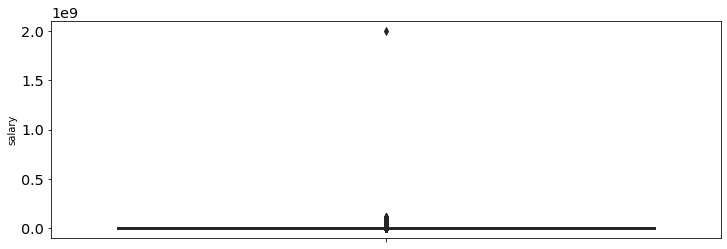

In [79]:
sns.boxplot(y=df['salary'], color='green', orient='v')

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20445 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35805 missing from current fon

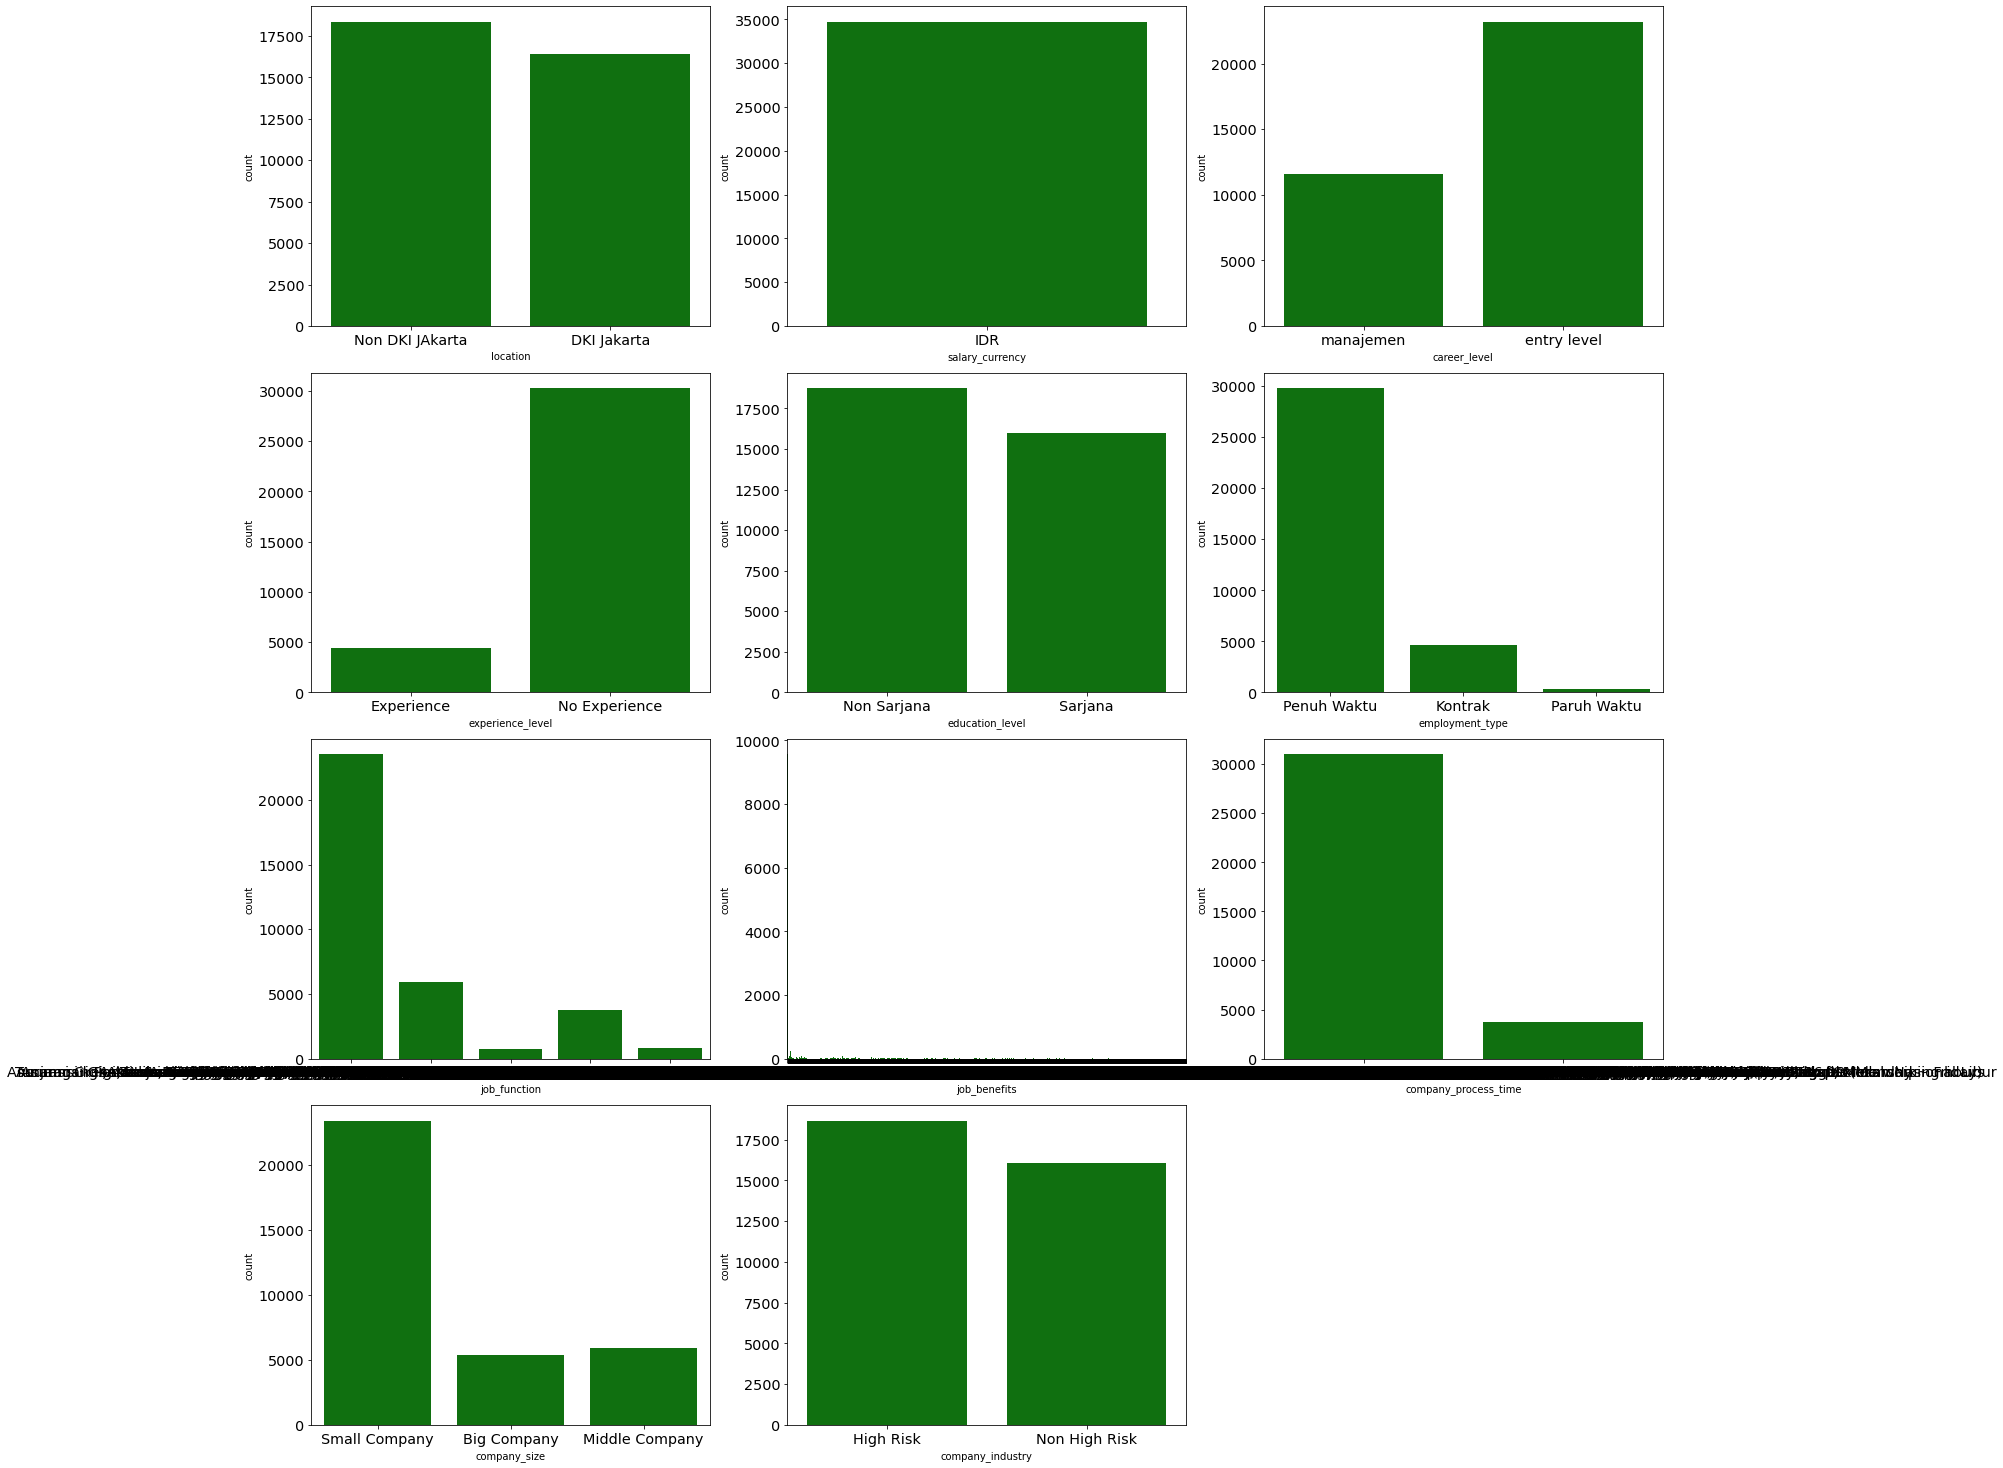

In [80]:
plt.figure(figsize=(20, 20))
for i in range(0, len(cat)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x = df[cat[i]], color='green', orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='location', ylabel='count'>

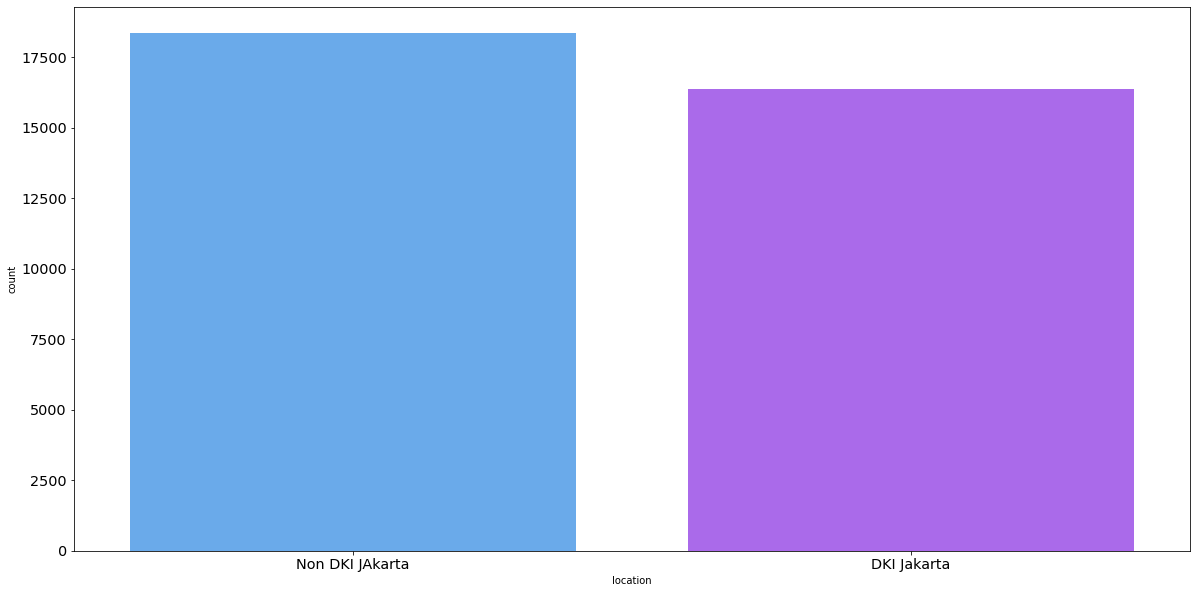

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['location'], palette='cool', orient='v')

<AxesSubplot:xlabel='salary_currency', ylabel='count'>

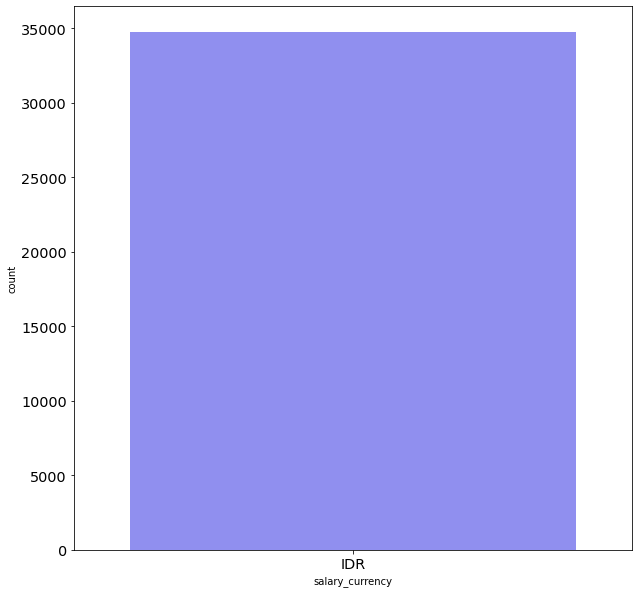

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(x = df['salary_currency'], palette='cool', orient='v')

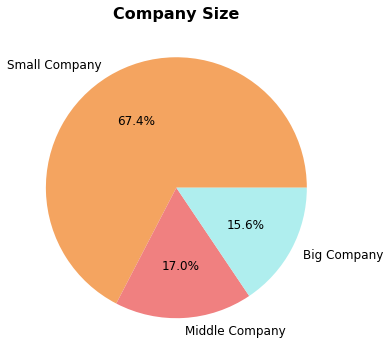

In [83]:
df['company_size'].value_counts().plot.pie(explode=None, autopct='%.1f%%', figsize=(6,6),fontsize=12, colors  = ("sandybrown", "lightcoral", "paleturquoise", "slateblue"))
plt.title('Company Size',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

<Figure size 1440x720 with 0 Axes>

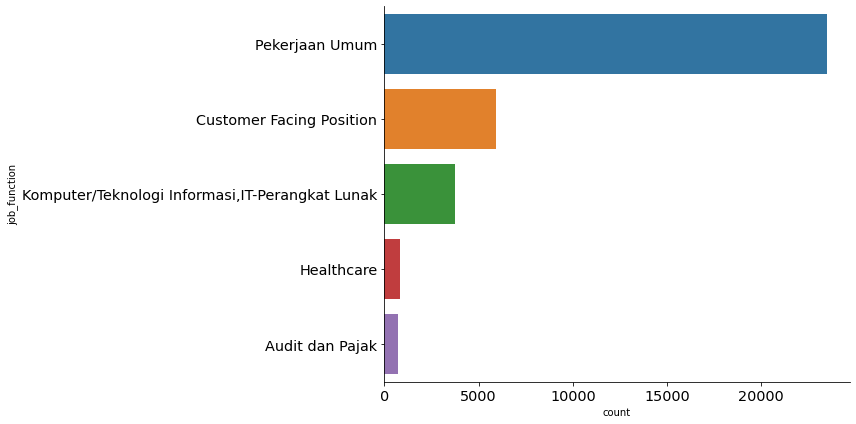

In [84]:
df3 = df['job_function'].value_counts().reset_index()
df3.columns = ['job_function', 'count']
df3

plt.figure(figsize=(20,10))
sns.catplot(x="count",
            y="job_function",
            kind="bar", 
            order = df3['job_function'],  height=6,
            aspect=2,
            data=df3);

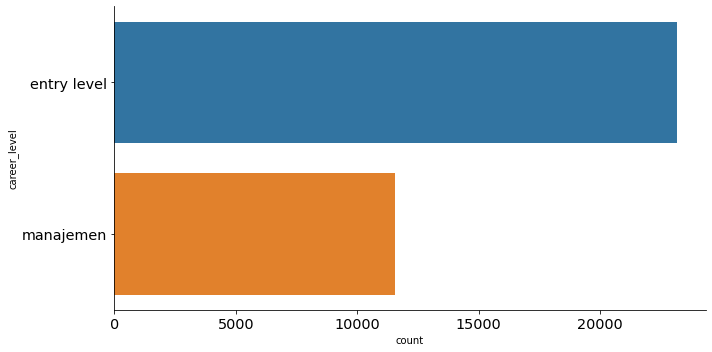

In [85]:
df4 = df['career_level'].value_counts().reset_index()
df4.columns = ['career_level', 'count']
df4

sns.catplot(x="count",
            y="career_level",
            kind="bar", 
            order = df4['career_level'],  height=5,
            aspect=2,
            data=df4);

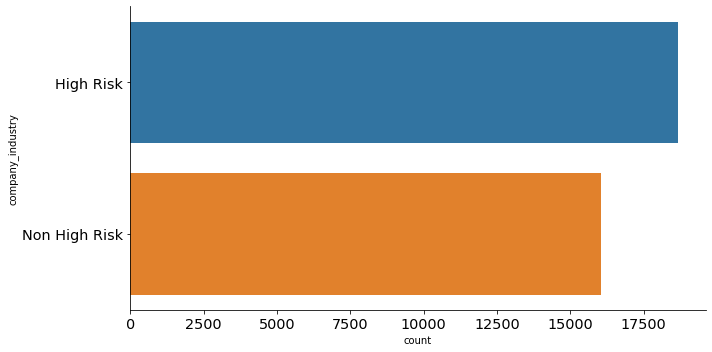

In [86]:
df5 = df['company_industry'].value_counts().reset_index()
df5.columns = ['company_industry', 'count']
df5

sns.catplot(x="count",
            y="company_industry",
            kind="bar", 
            order = df5['company_industry'],  height=5,
            aspect=2,
            data=df5);

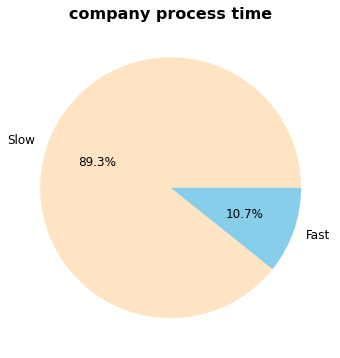

In [87]:
df['company_process_time'].value_counts().plot.pie(explode=None, autopct='%.1f%%', figsize=(6,6),fontsize=12, colors  = ("bisque", "skyblue", "hotpink", "orchid"))
plt.title('company process time',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

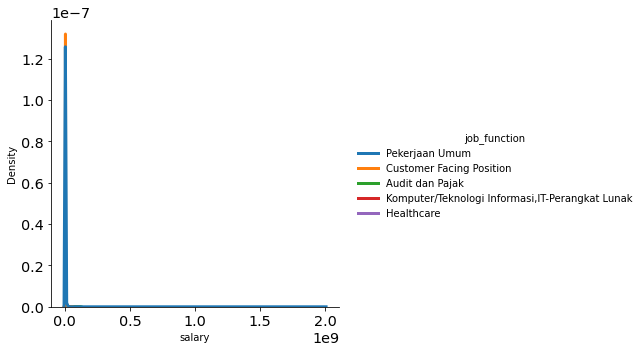

In [88]:
sns.displot(df, x="salary", hue="job_function", kind="kde")

<AxesSubplot:xlabel='job_function', ylabel='salary'>

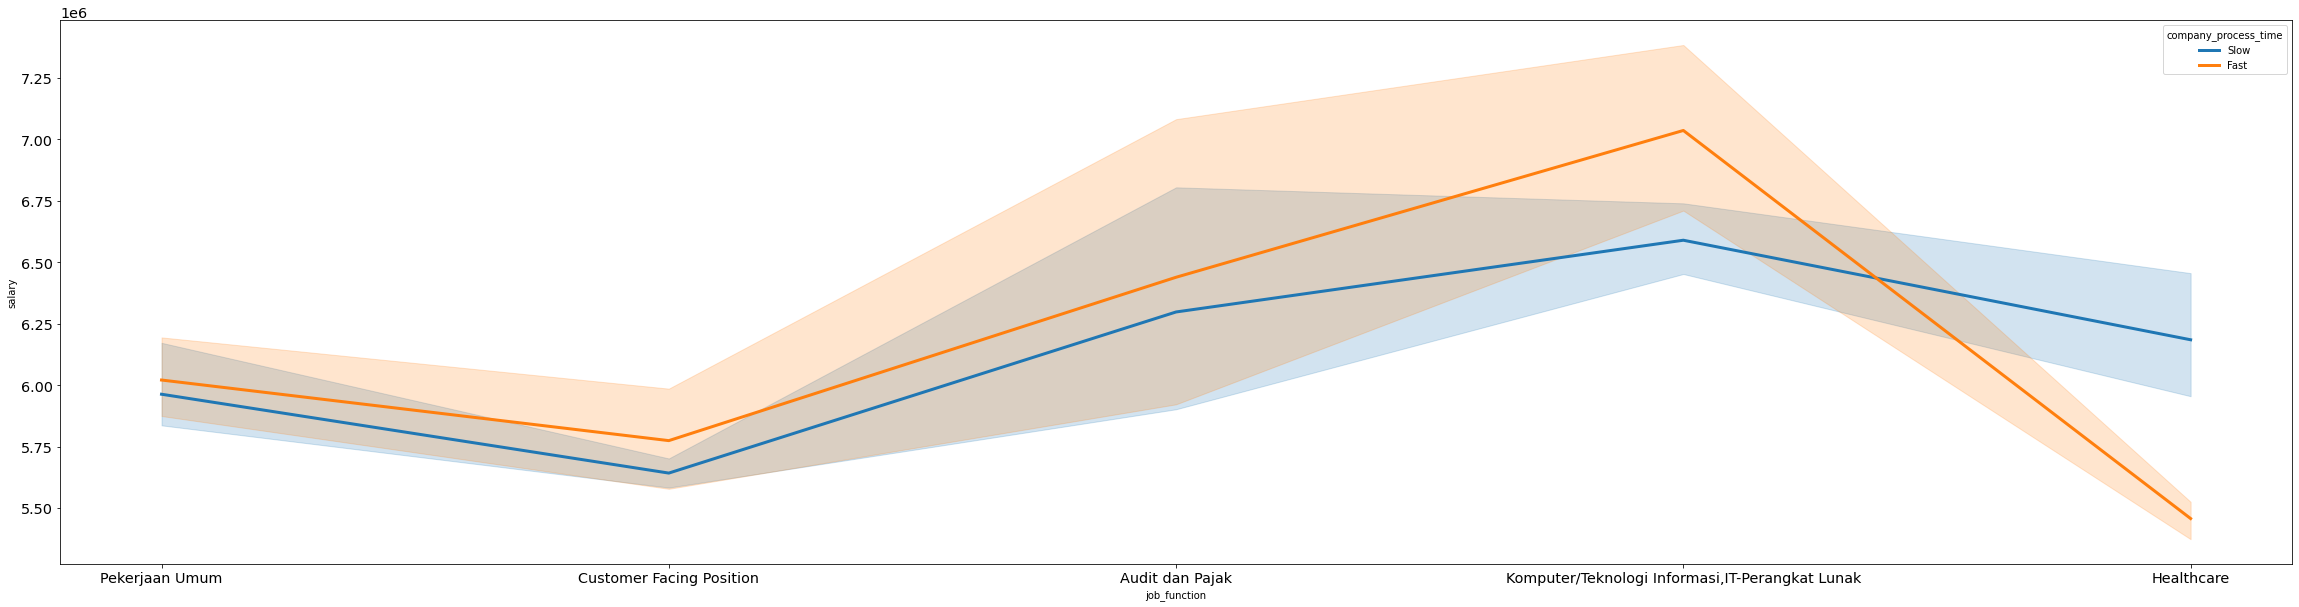

In [89]:
plt.figure(figsize=(40,10))
sns.lineplot(data=df, y='salary', x="job_function", hue="company_process_time")

<AxesSubplot:xlabel='salary', ylabel='job_function'>

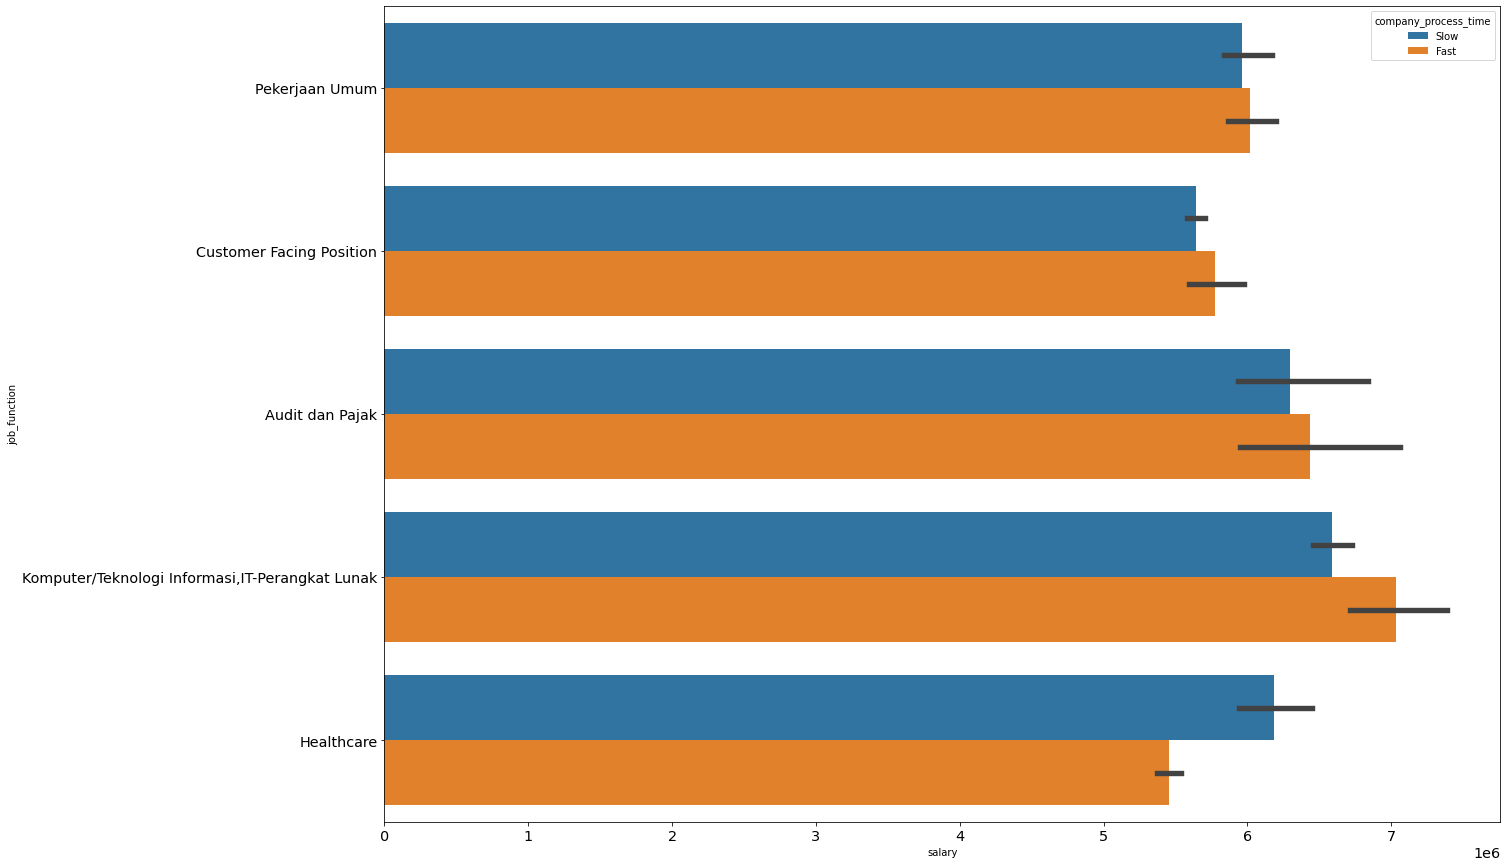

In [90]:
plt.figure(figsize=(20,15))
sns.barplot(data=df, x='salary', y="job_function", hue="company_process_time")

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:xlabel='salary'>

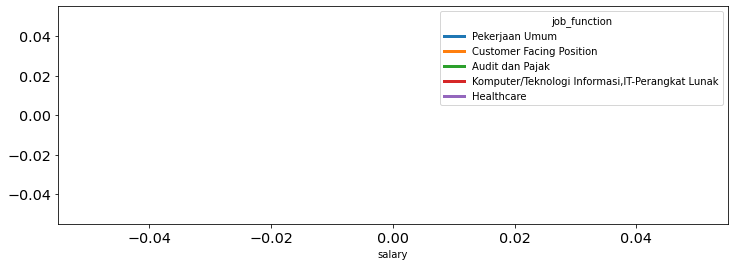

In [91]:
sns.lineplot(data=df, x="salary", hue="job_function")

<AxesSubplot:xlabel='salary', ylabel='company_process_time'>

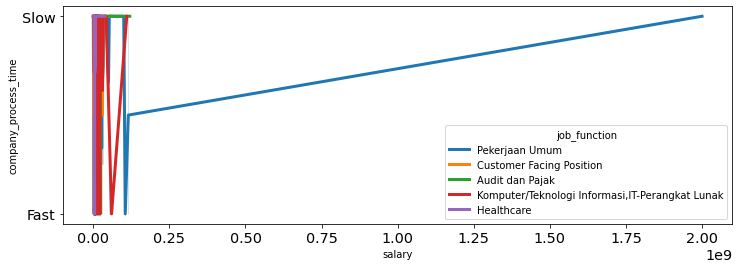

In [94]:
sns.lineplot(data=df, y='company_process_time', x="salary", hue="job_function")

<AxesSubplot:xlabel='company_process_time', ylabel='salary'>

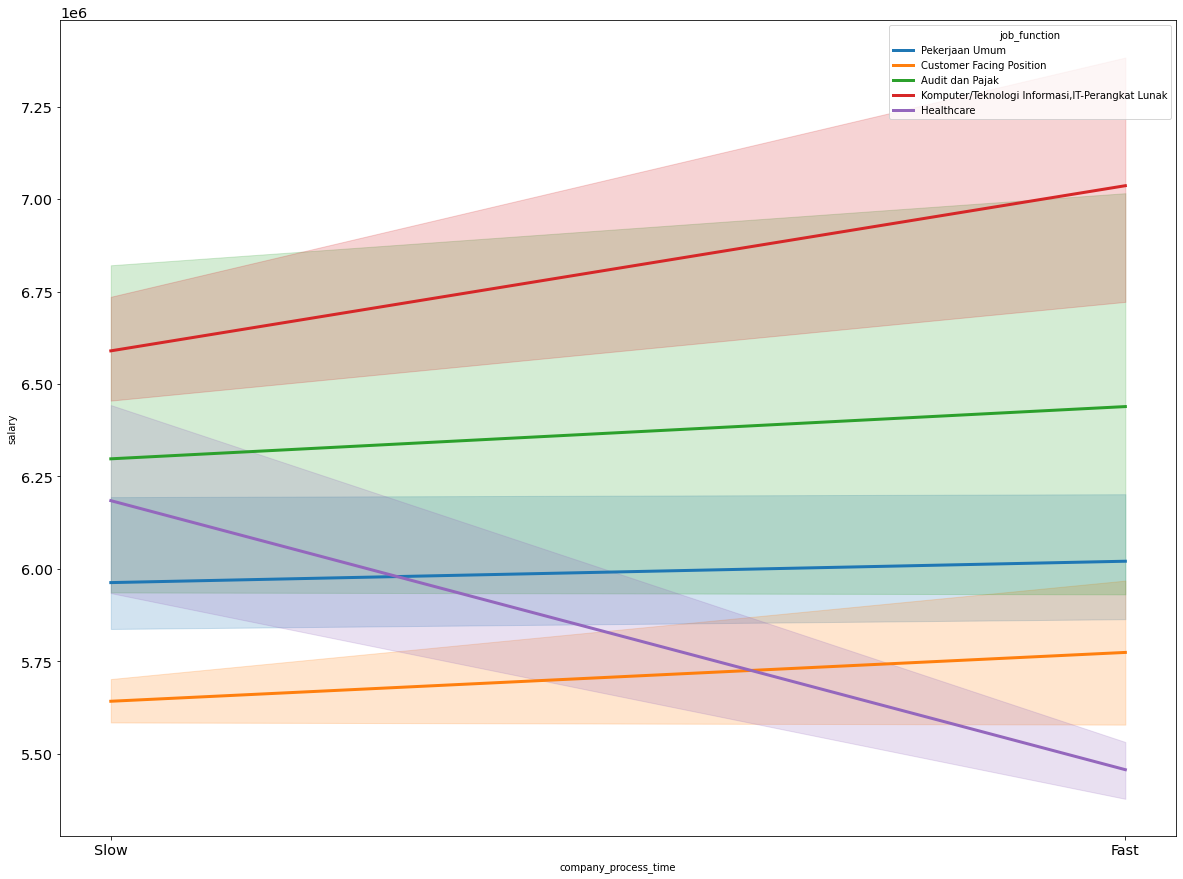

In [95]:
plt.figure(figsize=(20,15))
sns.lineplot(data=df, x='company_process_time', y="salary", hue="job_function")

<AxesSubplot:xlabel='job_function', ylabel='company_process_time'>

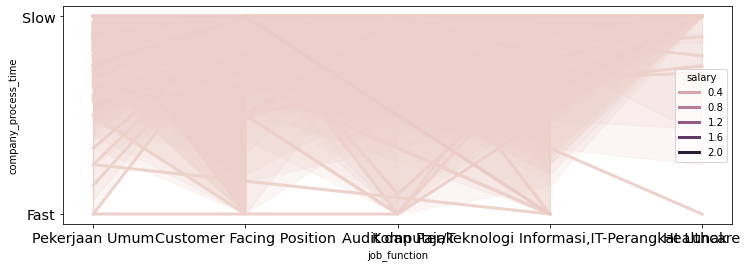

In [96]:
sns.lineplot(data=df, y='company_process_time', x="job_function", hue="salary")

<AxesSubplot:xlabel='company_process_time', ylabel='job_function'>

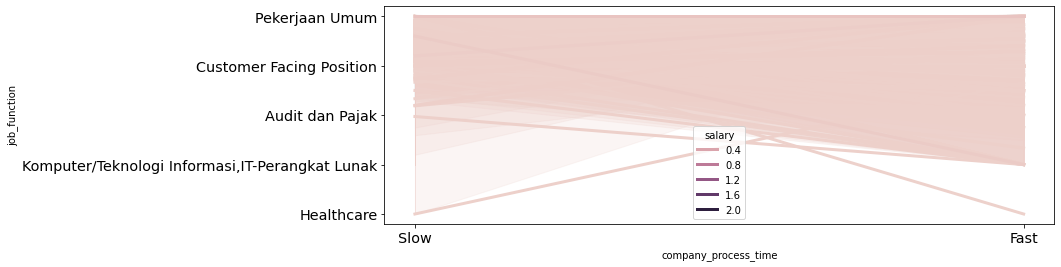

In [97]:
sns.lineplot(data=df, y='job_function', x="company_process_time", hue="salary")

<Figure size 1440x1080 with 0 Axes>

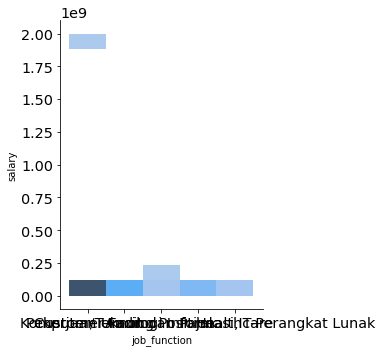

In [99]:
plt.figure(figsize=(20,15))
sns.displot(data=df, y='salary', x="job_function")

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


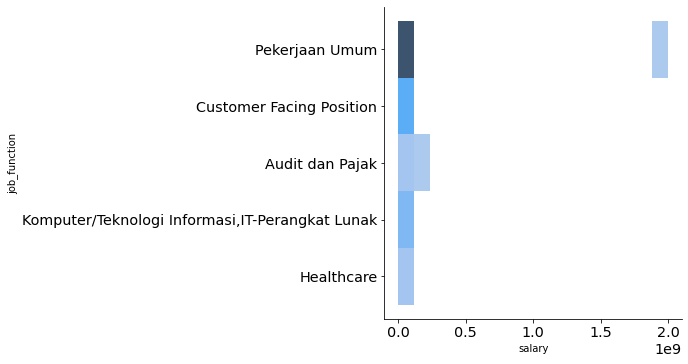

In [100]:
sns.displot(data=df, y='job_function', x="salary")

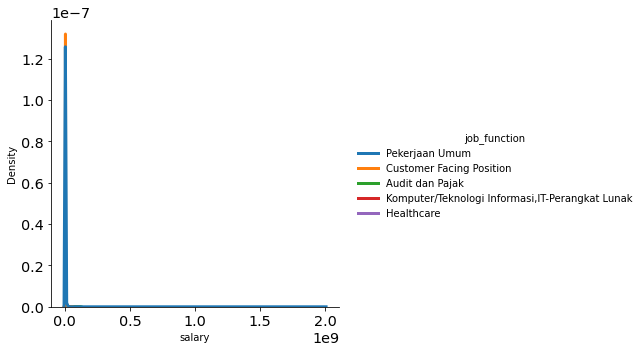

In [101]:
sns.displot(data=df, x="salary", hue="job_function", kind="kde")

In [102]:
df1=df.groupby('job_function').agg({'salary':'mean'})

In [103]:
df1

,salary
job_function,
Audit dan Pajak,6.314077e+06
Customer Facing Position,5.653263e+06
Healthcare,6.121230e+06
"Komputer/Teknologi Informasi,IT-Perangkat Lunak",6.663844e+06
Pekerjaan Umum,5.969129e+06


In [104]:
df2=df.groupby(['job_function','company_process_time']).agg({'salary':'mean'})

In [105]:
df2

salary
job_function                                    company_process_time              
Audit dan Pajak                                 Fast                  6.438953e+06
                                                Slow                  6.297731e+06
Customer Facing Position                        Fast                  5.774336e+06
                                                Slow                  5.642305e+06
Healthcare                                      Fast                  5.457320e+06
                                                Slow                  6.184632e+06
Komputer/Teknologi Informasi,IT-Perangkat Lunak Fast                  7.036087e+06
                                                Slow                  6.589587e+06
Pekerjaan Umum                                  Fast                  6.020867e+06
                                                Slow                  5.963093e+06

In [106]:
df2

salary
job_function                                    company_process_time              
Audit dan Pajak                                 Fast                  6.438953e+06
                                                Slow                  6.297731e+06
Customer Facing Position                        Fast                  5.774336e+06
                                                Slow                  5.642305e+06
Healthcare                                      Fast                  5.457320e+06
                                                Slow                  6.184632e+06
Komputer/Teknologi Informasi,IT-Perangkat Lunak Fast                  7.036087e+06
                                                Slow                  6.589587e+06
Pekerjaan Umum                                  Fast                  6.020867e+06
                                                Slow                  5.963093e+06

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34735 entries, 1 to 34746
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_title             34735 non-null  object 
 1   location              34735 non-null  object 
 2   salary_currency       34735 non-null  object 
 3   career_level          34735 non-null  object 
 4   experience_level      34735 non-null  object 
 5   education_level       34735 non-null  object 
 6   employment_type       34735 non-null  object 
 7   job_function          34735 non-null  object 
 8   job_benefits          34735 non-null  object 
 9   company_process_time  34735 non-null  object 
 10  company_size          34735 non-null  object 
 11  company_industry      34735 non-null  object 
 12  job_description       34735 non-null  object 
 13  salary                34735 non-null  float64
dtypes: float64(1), object(13)
memory usage: 5.0+ MB


In [108]:
df3=df.groupby('location').agg({'salary':'mean'})

In [109]:
df3

,salary
location,
DKI Jakarta,6.227400e+06
Non DKI JAkarta,5.798509e+06


In [110]:
df4=df.groupby(['location','job_function']).agg({'salary':'mean'})

In [111]:
df4

salary
location        job_function                                                 
DKI Jakarta     Audit dan Pajak                                  6.583717e+06
                Customer Facing Position                         5.874919e+06
                Healthcare                                       5.912878e+06
                Komputer/Teknologi Informasi,IT-Perangkat Lunak  6.856247e+06
                Pekerjaan Umum                                   6.157228e+06
Non DKI JAkarta Audit dan Pajak                                  5.849862e+06
                Customer Facing Position                         5.471858e+06
                Healthcare                                       6.262892e+06
                Komputer/Teknologi Informasi,IT-Perangkat Lunak  6.249975e+06
                Pekerjaan Umum                                   5.820849e+06

### Correlation

In [112]:
df.corr

<bound method DataFrame.corr of                                                job_title         location  \
id                                                                          
1         Facility Maintenance & Smart Warehouse Manager  Non DKI JAkarta   
2                            Procurement Department Head      DKI Jakarta   
3                                            SALES ADMIN      DKI Jakarta   
4           City Operation Lead Shopee Express (Cirebon)  Non DKI JAkarta   
5                                   Japanese Interpreter  Non DKI JAkarta   
...                                                  ...              ...   
34742                                   Staff Accounting  Non DKI JAkarta   
34743                                 Frontend Developer      DKI Jakarta   
34744                                    Account Manager      DKI Jakarta   
34745                                              Sales  Non DKI JAkarta   
34746  Credit Marketing Officer (CMO) - Tang

correlation buat kategori

In [ ]:
#pip install dython

In [ ]:
#from dython.nominal import associations, identify_nominal_columns
#associations(df[['job_title','location','salary_currency','career_level','experience_level','education_level','employment_type','job_function','job_benefits','company_process_time','company_size','company_industry','job_description']], figsize=(10,10), nan_strategy='drop_samples')

In [ ]:
df.info()

# Data Preprocessing

### Drop Feature With much unique value

In [113]:
df=df.drop(['job_title','job_benefits','job_description', 'salary_currency'], axis=1)

### Handling Outliers

<AxesSubplot:ylabel='salary'>

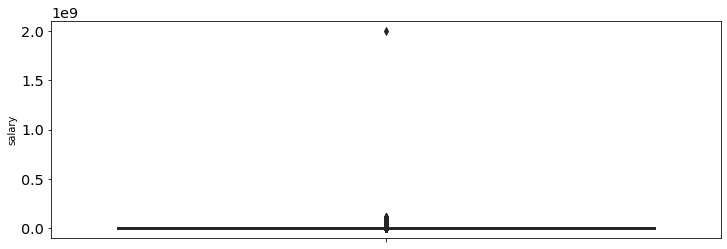

In [114]:
sns.boxplot(y=df['salary'], color='green', orient='v')

In [115]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 34735
Jumlah baris setelah memfilter outlier: 34697


## Feature Encoding

In [116]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
location,34697,2,Non DKI JAkarta,18346
career_level,34697,2,entry level,23185
experience_level,34697,2,No Experience,30293
education_level,34697,2,Non Sarjana,18751
employment_type,34697,3,Penuh Waktu,29787
job_function,34697,5,Pekerjaan Umum,23500
company_process_time,34697,2,Slow,30974
company_size,34697,3,Small Company,23368
company_industry,34697,2,High Risk,18639


In [117]:
#Label Encoding : company_process_time(2), experience_level(4),  education level(6), career_level, company_size, salary_currency,
mapping_location = {'Non DKI JAkarta': 0, 'DKI Jakarta' : 1}
mapping_education = {'Sarjana' : 0, 'Non Sarjana' : 1}
mapping_companysize = {'Small Company' : 0, 'Middle Company' : 1,'Big Company' : 2}
mapping_processtime = {'Fast': 0, 'Slow' : 1}
mapping_company_industry= {'High Risk': 0, 'Non High Risk' : 1}
mapping_experience = {'No Experience' : 0, 'Experience' : 1}
mapping_career = {'entry level' : 0, 'manajemen':1}

df['location'] = df['location'].map(mapping_location)
df['education_level'] = df['education_level'].map(mapping_education)
df['company_size'] = df['company_size'].map(mapping_companysize)
df['company_process_time'] = df['company_process_time'].map(mapping_processtime)
df['company_industry'] = df['company_industry'].map(mapping_company_industry)
df['experience_level'] = df['experience_level'].map(mapping_experience)
df['career_level'] = df['career_level'].map(mapping_career)

In [118]:
df.isna().sum()

location                0
career_level            0
experience_level        0
education_level         0
employment_type         0
job_function            0
company_process_time    0
company_size            0
company_industry        0
salary                  0
dtype: int64

In [119]:
#One Hot Encoding : JobFunction, 
cats_agg = ['employment_type','job_function']
for cats_agg in ['employment_type','job_function']:
    onehots = pd.get_dummies(df[cats_agg], prefix=cats_agg)
    df = df.join(onehots)

In [120]:
df = df.drop(['employment_type','job_function'], axis=1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34697 entries, 1 to 34746
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   location                                                      34697 non-null  int64  
 1   career_level                                                  34697 non-null  int64  
 2   experience_level                                              34697 non-null  int64  
 3   education_level                                               34697 non-null  int64  
 4   company_process_time                                          34697 non-null  int64  
 5   company_size                                                  34697 non-null  int64  
 6   company_industry                                              34697 non-null  int64  
 7   salary                                                        34697

In [122]:
df.isna().sum()

location                                                        0
career_level                                                    0
experience_level                                                0
education_level                                                 0
company_process_time                                            0
company_size                                                    0
company_industry                                                0
salary                                                          0
employment_type_Kontrak                                         0
employment_type_Paruh Waktu                                     0
employment_type_Penuh Waktu                                     0
job_function_Audit dan Pajak                                    0
job_function_Customer Facing Position                           0
job_function_Healthcare                                         0
job_function_Komputer/Teknologi Informasi,IT-Perangkat Lunak    0
job_functi

## Feature Selection

In [123]:
df.corr()

,location,career_level,experience_level,education_level,company_process_time,company_size,company_industry,salary,employment_type_Kontrak,employment_type_Paruh Waktu,employment_type_Penuh Waktu,job_function_Audit dan Pajak,job_function_Customer Facing Position,job_function_Healthcare,"job_function_Komputer/Teknologi Informasi,IT-Perangkat Lunak",job_function_Pekerjaan Umum
location,1.000000,0.014096,0.063412,-0.095745,-0.009427,-0.055848,-0.030379,0.086291,-0.029677,-0.014578,0.032773,0.047447,-0.019511,-0.020511,0.146577,-0.089463
career_level,0.014096,1.000000,0.421403,-0.192748,0.024572,0.097499,-0.046505,0.233234,-0.047524,-0.042006,0.057438,0.022078,-0.034132,-0.032333,-0.080822,0.084581
experience_level,0.063412,0.421403,1.000000,-0.176159,0.012742,-0.012191,-0.107342,0.216886,-0.048753,-0.019711,0.052713,0.024522,-0.035902,-0.033352,-0.015149,0.042076
education_level,-0.095745,-0.192748,-0.176159,1.000000,0.025410,-0.073132,0.026202,-0.070988,0.065367,0.016786,-0.068115,-0.050184,0.001076,0.010785,-0.024593,0.027473
company_process_time,-0.009427,0.024572,0.012742,0.025410,1.000000,0.046976,0.035677,-0.026972,0.033925,0.004215,-0.034157,-0.004181,0.035575,0.010010,-0.066151,0.013258
company_size,-0.055848,0.097499,-0.012191,-0.073132,0.046976,1.000000,0.078184,-0.041752,-0.002480,-0.026473,0.009447,0.014510,-0.044181,-0.016211,-0.026754,0.054010
company_industry,-0.030379,-0.046505,-0.107342,0.026202,0.035677,0.078184,1.000000,-0.066033,-0.016440,0.036310,0.006365,-0.029563,0.124861,0.131615,-0.113549,-0.058475
salary,0.086291,0.233234,0.216886,-0.070988,-0.026972,-0.041752,-0.066033,1.000000,-0.056667,-0.033176,0.063997,0.011343,-0.046220,0.014866,0.098183,-0.036122
employment_type_Kontrak,-0.029677,-0.047524,-0.048753,0.065367,0.033925,-0.002480,-0.016440,-0.056667,1.000000,-0.036556,-0.964126,-0.021410,0.023642,0.004693,-0.011878,-0.006051
employment_type_Paruh Waktu,-0.014578,-0.042006,-0.019711,0.016786,0.004215,-0.026473,0.036310,-0.033176,-0.036556,1.000000,-0.230024,-0.013796,0.050273,0.041526,-0.013303,-0.040743


<AxesSubplot:>

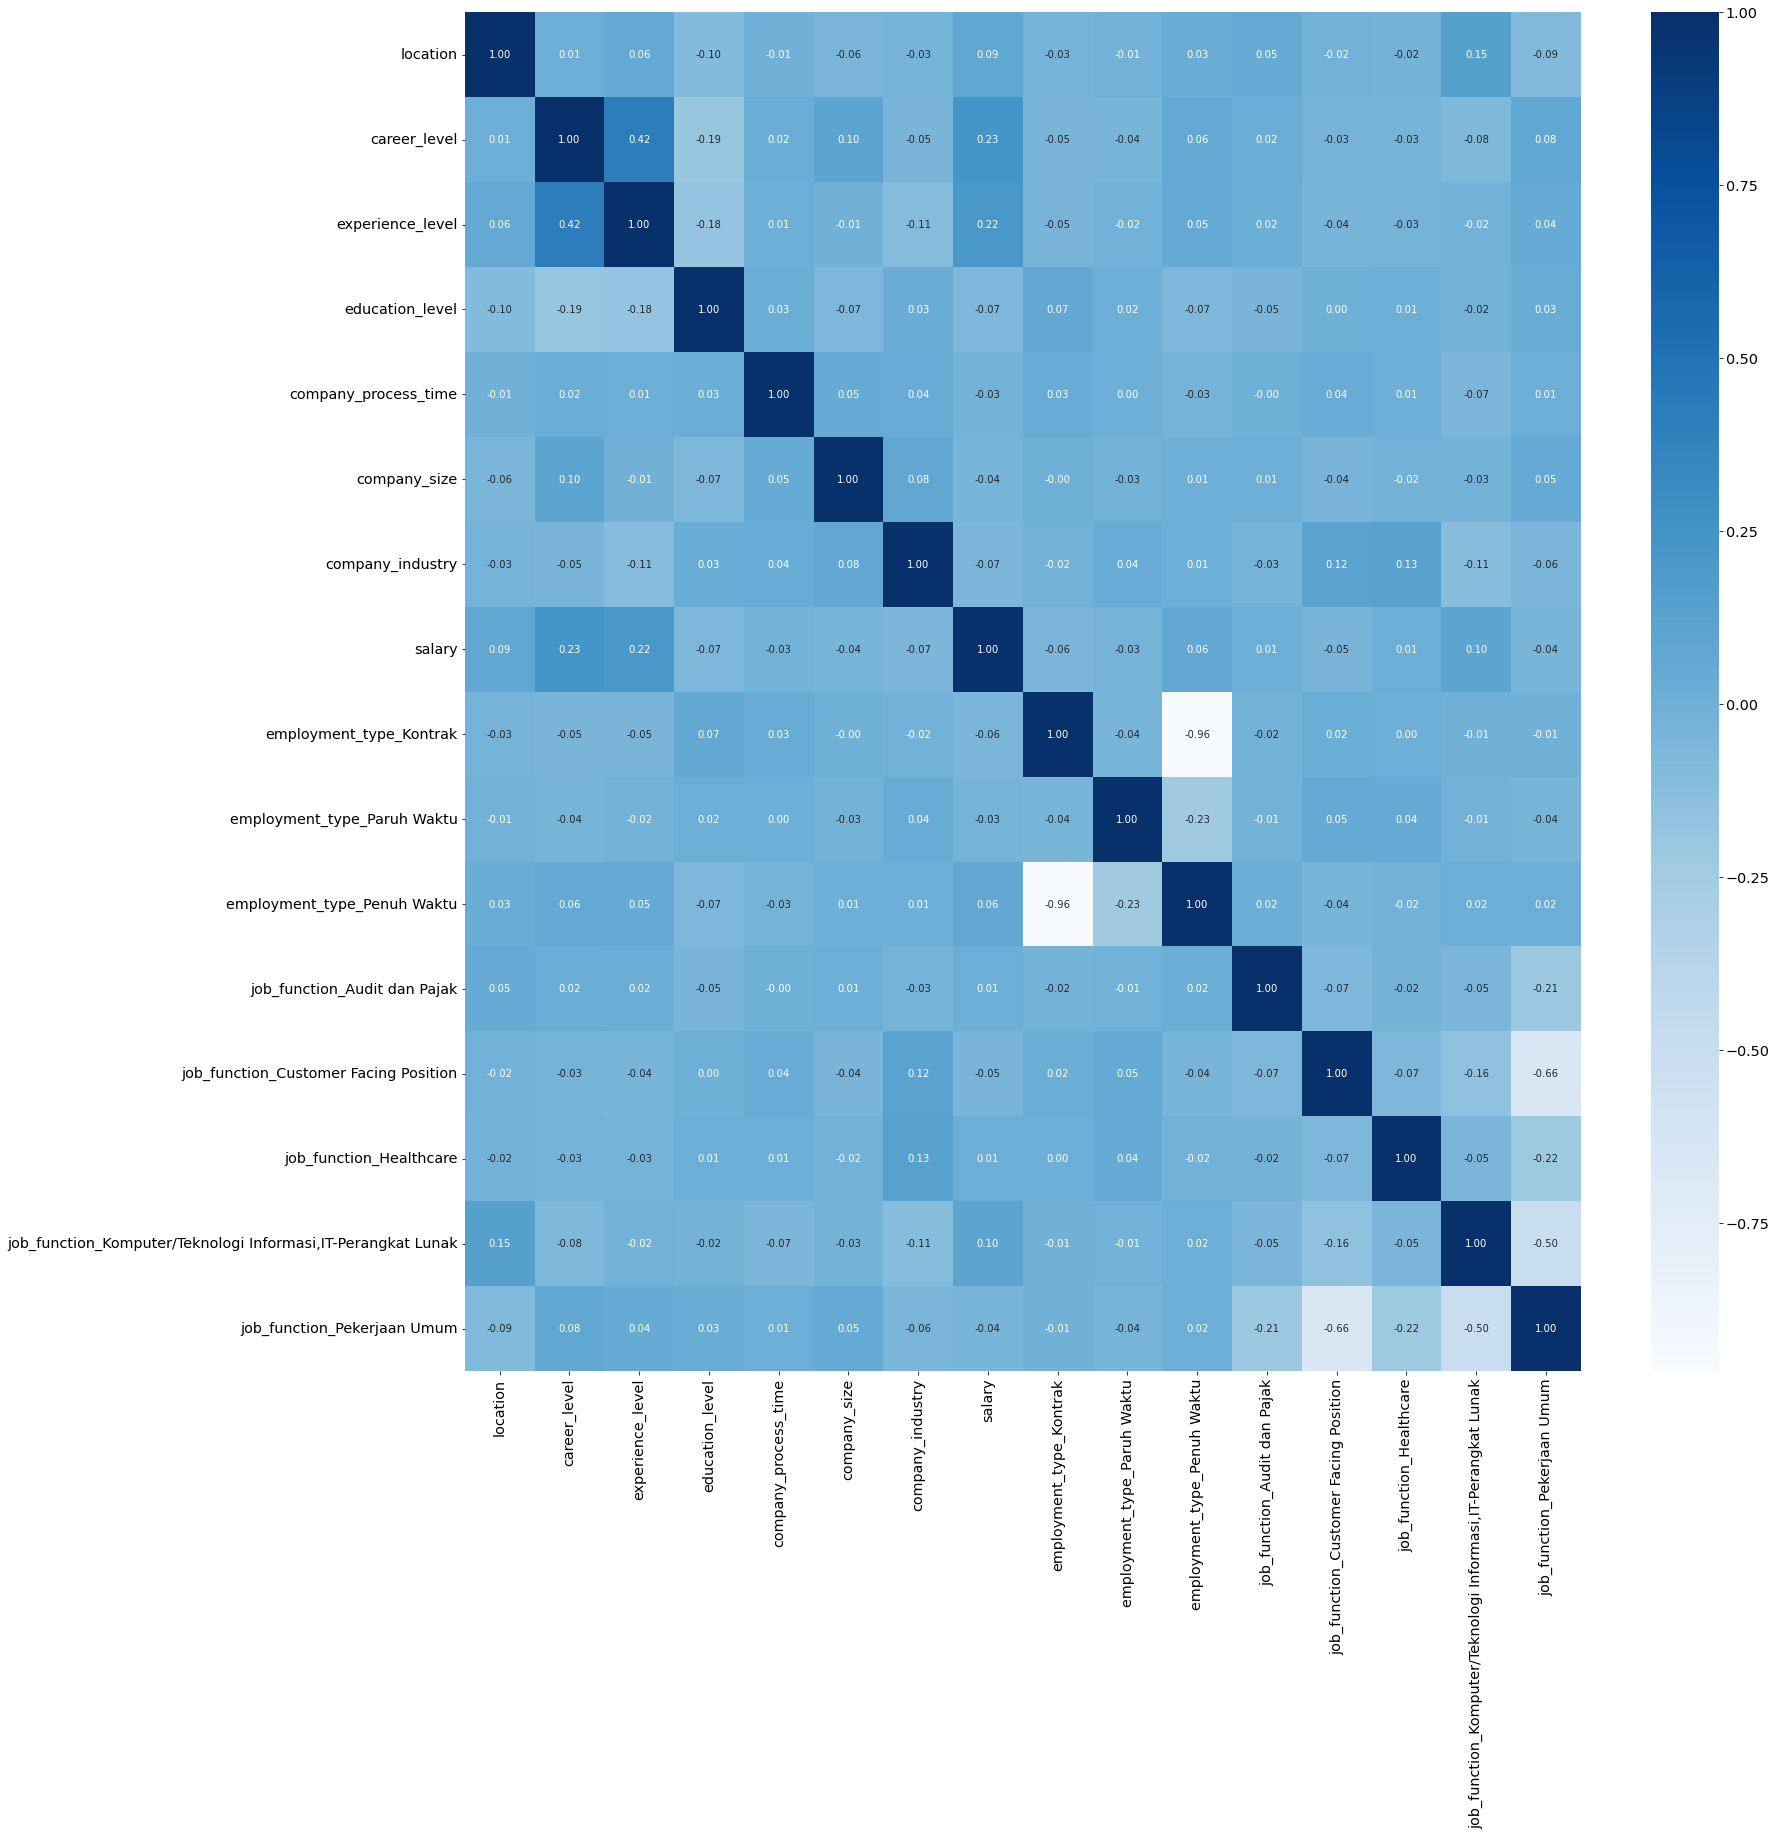

In [124]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

#### Drop columns with redundant variabel

In [125]:
correlation_matrix = df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
drop_high_correlation = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\User\AppData\Local\Temp/ipykernel_15040/155009815.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [126]:
drop_high_correlation

['employment_type_Penuh Waktu']

In [127]:
cor = df.corr()

In [128]:
#Correlation with output variable
cor_target = abs(cor["salary"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

location                                                        0.086291
career_level                                                    0.233234
experience_level                                                0.216886
education_level                                                 0.070988
company_size                                                    0.041752
company_industry                                                0.066033
salary                                                          1.000000
employment_type_Kontrak                                         0.056667
employment_type_Paruh Waktu                                     0.033176
employment_type_Penuh Waktu                                     0.063997
job_function_Customer Facing Position                           0.046220
job_function_Komputer/Teknologi Informasi,IT-Perangkat Lunak    0.098183
job_function_Pekerjaan Umum                                     0.036122
Name: salary, dtype: float64

In [137]:
data=df[['location','career_level','experience_level','education_level','company_size','company_industry','employment_type_Kontrak',
         'employment_type_Paruh Waktu','employment_type_Penuh Waktu','job_function_Customer Facing Position',
         'job_function_Komputer/Teknologi Informasi,IT-Perangkat Lunak','job_function_Pekerjaan Umum','salary']]

### Feature Scaling

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data['salary']=MinMaxScaler().fit_transform(df['salary'].values.reshape(len(df), 1))

C:\Users\User\AppData\Local\Temp/ipykernel_15040/654649207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary']=MinMaxScaler().fit_transform(df['salary'].values.reshape(len(df), 1))


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34697 entries, 1 to 34746
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   location                                                      34697 non-null  int64  
 1   career_level                                                  34697 non-null  int64  
 2   experience_level                                              34697 non-null  int64  
 3   education_level                                               34697 non-null  int64  
 4   company_size                                                  34697 non-null  int64  
 5   company_industry                                              34697 non-null  int64  
 6   employment_type_Kontrak                                       34697 non-null  uint8  
 7   employment_type_Paruh Waktu                                   34697

In [133]:
data.head()

,location,career_level,experience_level,education_level,company_size,company_industry,employment_type_Kontrak,employment_type_Paruh Waktu,employment_type_Penuh Waktu,job_function_Customer Facing Position,"job_function_Komputer/Teknologi Informasi,IT-Perangkat Lunak",job_function_Pekerjaan Umum,salary
id,,,,,,,,,,,,,
1,0,1,1,1,0,0,0,0,1,0,0,1,0.142857
2,1,1,1,0,0,0,0,0,1,0,0,1,0.142857
3,1,1,0,0,0,1,0,0,1,0,0,1,0.142857
4,0,1,1,0,2,1,0,0,1,1,0,0,0.142857
5,0,0,0,1,0,0,0,0,1,1,0,0,0.142857


# Modeling

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_metrics_evaluation(model, y_pred, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_test, y_pred, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
  print('R2: '+ str(r2_score(y_test, y_pred)))

def train_metrics_evaluation(model, y_pred_train, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_train, y_pred_train, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
  print('R2: '+ str(r2_score(y_train, y_pred_train)))

def show_feature_importance(model):
  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  ax = feature_importance.nlargest(25).plot(kind='barh', figsize=(10,8))
  ax.invert_yaxis()
  plt.xlabel('Score')
  plt.ylabel('Features')
  plt.title('Feature Importance Score')

def show_best_hyperparameter(model, hyperparameters):
  for key, value in hyperparameters.items():
    print('Best '+key+':', model.get_params()[key])

## Split Feature and Label

In [136]:
X = data['location','career_level','experience_level','education_level','company_size','company_industry','employment_type_Kontrak',
         'employment_type_Paruh Waktu','employment_type_Penuh Waktu','job_function_Customer Facing Position',
         'job_function_Komputer/Teknologi Informasi,IT-Perangkat Lunak','job_function_Pekerjaan Umum']
y = data['salary'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

KeyError: ('location', 'career_level', 'experience_level', 'education_level', 'company_size', 'company_industry', 'employment_type_Kontrak', 'employment_type_Paruh Waktu', 'employment_type_Penuh Waktu', 'job_function_Customer Facing Position', 'job_function_Komputer/Teknologi Informasi,IT-Perangkat Lunak', 'job_function_Pekerjaan Umum')

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(X_train.columns)):
    plt.subplot(3, 6, i+1)
    sns.kdeplot(x = X_train[X_train.columns[i]], color = 'green')
    plt.tight_layout()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

In [ ]:
test_metrics_evaluation(regressor, y_pred, X_train, X_test, y_train, y_test)

In [ ]:
train_metrics_evaluation(regressor, y_pred_train, X_train, X_test, y_train, y_test)

In [ ]:
print('Train Accuracy: ', regressor.score(X_train, y_train))
print('Test Accuracy: ', regressor.score(X_test, y_test))

In [ ]:
X_test.head(3)

In [ ]:
y_test.head()

#### Hyperparameter Tuning

##### Ridge

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import uniform

# List dari hyperparameter
alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500]
solver = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

# Fit model
ridge = Ridge(random_state=0)
clf = RandomizedSearchCV(ridge, hyperparameters, cv=5, random_state=0, scoring='r2')
best_model = clf.fit(X_train, y_train)

# Evaluasi model
y_pred = best_model.predict(X_test)
test_metrics_evaluation(best_model, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_best_hyperparameter(best_model.best_estimator_, hyperparameters)

In [ ]:
print('Train score: ' + str(best_model.score(X_train, y_train)))
print('Test score: ' + str(best_model.score(X_test, y_test)))

##### Lasso

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from scipy.stats import uniform

# List dari hyperparameter
alpha = [0.02, 0.024, 0.025, 0.026, 0.03]
selection = ['cyclic', 'random']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, selection=selection, fit_intercept=fit_intercept)

# Fit model
lasso = Lasso(random_state=77)
clf = RandomizedSearchCV(lasso, hyperparameters, cv=5, random_state=77, scoring='r2')
best_model = clf.fit(X_train, y_train)

# Evaluasi model
y_pred = best_model.predict(X_test)
test_metrics_evaluation(best_model, y_pred, X_train, y_train, X_test, y_test)

In [ ]:

show_best_hyperparameter(best_model.best_estimator_, hyperparameters)

In [ ]:
print('Train score: ' + str(best_model.score(X_train, y_train)))
print('Test score: ' + str(best_model.score(X_test, y_test)))

##### Elastic Net

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform

# List dari hyperparameter
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=fit_intercept)

# Fit model
elasticnet = ElasticNet(random_state=77)
clf = RandomizedSearchCV(elasticnet, hyperparameters, cv=5, random_state=77, scoring='r2')
best_model = clf.fit(X_train, y_train)

# Evaluasi model
y_pred = best_model.predict(X_test)
test_metrics_evaluation(best_model, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_best_hyperparameter(best_model.best_estimator_, hyperparameters)

In [ ]:
print('Train score: ' + str(best_model.score(X_train, y_train)))
print('Test score: ' + str(best_model.score(X_test, y_test)))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [ ]:
test_metrics_evaluation(dt, y_pred, X_train, X_test, y_train, y_test)

In [ ]:
train_metrics_evaluation(dt, y_pred_train, X_train, X_test, y_train, y_test)

In [ ]:
print('Train Accuracy: ', dt.score(X_train, y_train))
print('Test Accuracy: ', dt.score(X_test, y_test))

In [ ]:
show_feature_importance(dt)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
criterion = ['friedman_mse']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeRegressor(random_state=0)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, n_iter=15, cv=5, random_state=0, scoring='r2')
dt_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = dt_tuned.predict(X_test)
test_metrics_evaluation(dt_tuned, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_best_hyperparameter(dt_tuned.best_estimator_, hyperparameters)

In [ ]:
print('Train score: ' + str(dt_tuned.score(X_train, y_train)))
print('Test score:' + str(dt_tuned.score(X_test, y_test)))

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dt_tuned.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(dt_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score');

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
# Test
test_metrics_evaluation(rf, y_pred, X_train, X_test, y_train, y_test)

In [ ]:

# Train
train_metrics_evaluation(rf, y_pred_train, X_train, X_test, y_train, y_test)

In [ ]:
print('Train Accuracy: ', rf.score(X_train, y_train))
print('Test Accuracy: ', rf.score(X_test, y_test))

In [ ]:
show_feature_importance(rf)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


n_estimators = [15]

max_features = ['auto', 'sqrt']

max_depth = [10]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]


hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init
rf = RandomForestRegressor(random_state=0)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=0, n_iter=15, scoring='r2')
rf_tuned.fit(X_train, y_train)
# Predict & Evaluation
pred = rf_tuned.predict(X_test)
test_metrics_evaluation(rf_tuned, pred, X_train, y_train, X_test, y_test)

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

In [ ]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

## XGBoost Regressor

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBRegressor(random_state=0)
xg.fit(X_train, y_train)

In [ ]:
y_pred = xg.predict(X_test)
y_pred_train = xg.predict(X_train)

In [ ]:
# Test
test_metrics_evaluation(xg, y_pred, X_train, X_test, y_train, y_test)

In [ ]:
# Train
train_metrics_evaluation(xg, y_pred_train, X_train, X_test, y_train, y_test)

In [ ]:
print("Train Accuracy : ",xg.score(X_train,y_train))
print("Test Accuracy : ",xg.score(X_test,y_test))

In [ ]:
show_feature_importance(xg)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np


hyperparameters = {'max_depth': [10],
                   'eta':[0.9],
                   'min_child_weight' :[1, 10, 100], 
                   'n_estimators' : [15],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist']
                    }

xg = XGBRegressor(random_state=0)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=0, scoring='r2')
xg_tuned.fit(X_train,y_train)


y_pred = xg_tuned.predict(X_test)
test_metrics_evaluation(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

In [ ]:
print("Train Accuracy : ",xg_tuned.score(X_train,y_train))
print("Test Accuracy : ",xg_tuned.score(X_test,y_test))

## Evaluation